# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [13]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [15]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """

    y_pos = Y_train[Y_train==1]
    y_neg = Y_train[Y_train==-1]
    p_pos = len(y_pos)/len(Y_train)
    x_pos = X_train[Y_train==1,:]
    x_neg  = X_train[Y_train==-1,:]
    mu_pos = np.mean(x_pos,axis=0)
    mu_neg = np.mean(x_neg,axis=0)

    eta = eta_Bayes1a(mu_pos, mu_neg, p_pos, X_test)

    Y_test_pred = np.sign(2*eta-1)

    return Y_test_pred

def eta_Bayes1a(mean_pos, mean_neg, p, X_test):

    """Computes the Naive bayes classifier score
    
    Arguments :
    mean_pos : ML estimate of the mean for the +1 class. Shape = (d,)
    mean_neg : ML estimate of the mean for the -1 class. Shape = (d,)
    p : ML estimate for class prior.
    X_test : numpy array of shape (m,d)
    
    Returns :
    eta = 1/(1 + exp(w*X_test+b)). Shape = (m,)"""

    w = mean_neg - mean_pos
    b = 0.5*(np.linalg.norm(mean_pos)**2-np.linalg.norm(mean_neg)**2)
    b = b + np.log((1-p)/p)
    return 1/(1 + np.exp(X_test@w+b))
    
    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """

    y_pos = Y_train[Y_train==1]
    y_neg = Y_train[Y_train==-1]
    p_pos = len(y_pos)/len(Y_train)
    x_pos = X_train[Y_train==1,:]
    x_neg  = X_train[Y_train==-1,:]
    mu_pos = np.mean(x_pos,axis=0)
    mu_neg = np.mean(x_neg,axis=0)
    cov_pos = np.cov(x_pos.T,bias=True)*len(x_pos)
    cov_neg = np.cov(x_neg.T,bias=True)*len(x_neg)
    cov_tot = (cov_pos + cov_neg)/len(X_train)
    eta = eta_Bayes1bc(mu_pos, mu_neg, p_pos, cov_tot, cov_tot, X_test)

    Y_test_pred = np.sign(2*eta-1)

    return Y_test_pred

def eta_Bayes1bc(mean_pos, mean_neg, p, covariance_pos, covariance_neg, X_test):

    """Computes the bayes classifier score.
    
    Arguments :
    mean_pos : ML estimate of the mean for the +1 class. Shape = (d,)
    mean_neg : ML estimate of the mean for the -1 class. Shape = (d,)
    p : ML estimate for class prior.
    covariance_pos  : Covariance for +1 class
    covariance_neg  : Covariance for -1 class    
    X_test : numpy array of shape (m,d)
    
    Returns :
    eta(X_test) : shape (m,2)
    """
    
    cov_pos_inv = np.linalg.inv(covariance_pos)
    cov_neg_inv = np.linalg.inv(covariance_neg)
    coeff_pos = (X_test-np.reshape(mean_pos,(1,-1)))
    coeff2_pos = (coeff_pos@cov_pos_inv*coeff_pos).sum(axis=1)
    coeff_neg = (X_test-np.reshape(mean_neg,(1,-1)))
    coeff2_neg = (coeff_neg@cov_neg_inv*coeff_neg).sum(axis=1)
    det_pos = np.linalg.det(covariance_pos)**0.5
    det_neg = np.linalg.det(covariance_neg)**0.5
    b = np.log((1-p)/p)
    return 1/(1+ (det_pos/det_neg)*np.exp(b+0.5*coeff2_pos-0.5*coeff2_neg))


def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """

    y_pos = Y_train[Y_train==1]
    y_neg = Y_train[Y_train==-1]
    p_pos = len(y_pos)/len(Y_train)
    x_pos = X_train[Y_train==1,:]
    x_neg  = X_train[Y_train==-1,:]
    mu_pos = np.mean(x_pos,axis=0)
    mu_neg = np.mean(x_neg,axis=0)
    cov_pos = np.cov(x_pos.T,bias=True)
    cov_neg = np.cov(x_neg.T,bias=True)
    eta = eta_Bayes1bc(mu_pos, mu_neg, p_pos, cov_pos, cov_neg, X_test)

    Y_test_pred = np.sign(2*eta-1)

    return Y_test_pred





In [16]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)

#Checking the errors
#print(np.sum(np.sign(abs(Y_test - Y_pred_test_1a)))/np.size(Y_test))
#print(np.sum(np.sign(abs(Y_test - Y_pred_test_1b)))/np.size(Y_test))
#print(np.sum(np.sign(abs(Y_test - Y_pred_test_1c)))/np.size(Y_test))



**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


<Figure size 432x288 with 0 Axes>

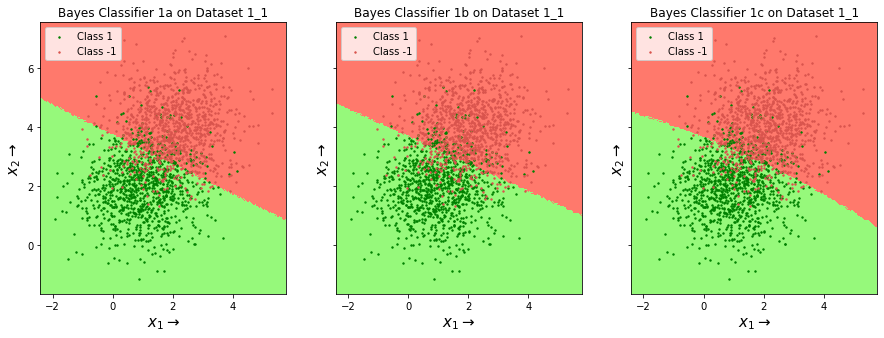

<Figure size 432x288 with 0 Axes>

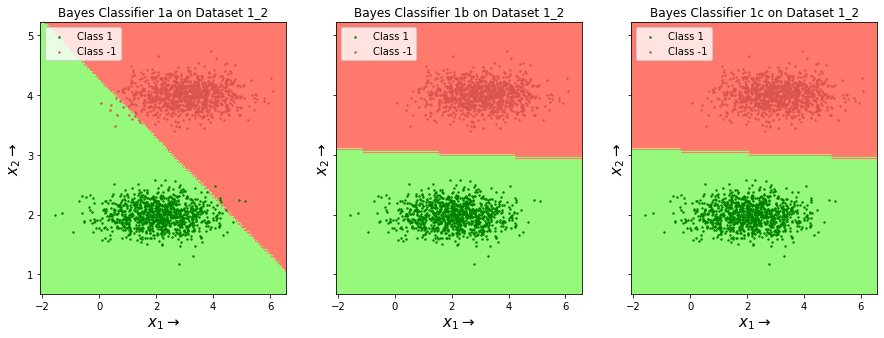

<Figure size 432x288 with 0 Axes>

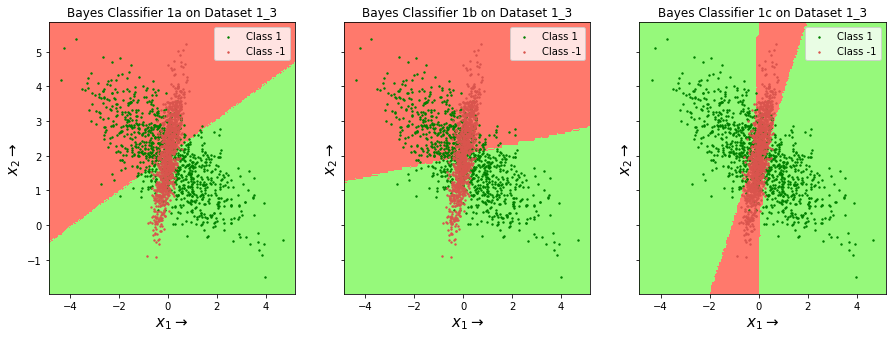

In [17]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

data1_1 = np.load('Data/dataset1_1.npz')
X_train, Y_train, X_test, Y_test = data1_1['arr_0'],data1_1['arr_1'],data1_1['arr_2'],data1_1['arr_3']
Y_pred_11a = Bayes1a(X_train,Y_train,X_test)
Y_pred_11b = Bayes1b(X_train,Y_train,X_test)
Y_pred_11c = Bayes1c(X_train,Y_train,X_test)
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])


X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
Za = Bayes1a(X_train,Y_train,test_samples)
Zb = Bayes1b(X_train,Y_train,test_samples)
Zc = Bayes1c(X_train,Y_train,test_samples)

plt.figure(0)
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
ax1.contourf(X,Y,Za.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
ax1.set_title('Bayes Classifier 1a on Dataset 1_1')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.legend() 

ax2.contourf(X,Y,Zb.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g', label='Class 1')
ax2.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d', label="Class -1")
ax2.set_title('Bayes Classifier 1b on Dataset 1_1')
ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax2.legend()
ax3.contourf(X,Y,Zc.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax3.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g', label='Class 1')
ax3.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d', label='Class -1')
ax3.set_title('Bayes Classifier 1c on Dataset 1_1')
ax3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax3.legend()
plt.show()

data1_2 = np.load('Data/dataset1_2.npz')
X_train, Y_train, X_test, Y_test = data1_2['arr_0'],data1_2['arr_1'],data1_2['arr_2'],data1_2['arr_3']
Y_pred_12a = Bayes1a(X_train,Y_train,X_test)
Y_pred_12b = Bayes1b(X_train,Y_train,X_test)
Y_pred_12c = Bayes1c(X_train,Y_train,X_test)
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])

X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
Za = Bayes1a(X_train,Y_train,test_samples)
Zb = Bayes1b(X_train,Y_train,test_samples)
Zc = Bayes1c(X_train,Y_train,test_samples)

plt.figure(1)
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
ax1.contourf(X,Y,Za.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='green',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
ax1.set_title('Bayes Classifier 1a on Dataset 1_2')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.legend()
ax2.contourf(X,Y,Zb.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g', label='Class 1')
ax2.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d', label='Class -1')
ax2.set_title('Bayes Classifier 1b on Dataset 1_2')
ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax2.legend()
ax3.contourf(X,Y,Zc.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax3.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax3.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d', label='Class -1')
ax3.set_title('Bayes Classifier 1c on Dataset 1_2')
ax3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax3.legend()
plt.show()

data1_3 = np.load('Data/dataset1_3.npz')
X_train, Y_train, X_test, Y_test = data1_3['arr_0'],data1_3['arr_1'],data1_3['arr_2'],data1_3['arr_3']
Y_pred_13a = Bayes1a(X_train,Y_train,X_test)
Y_pred_13b = Bayes1b(X_train,Y_train,X_test)
Y_pred_13c = Bayes1c(X_train,Y_train,X_test)
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])



X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
Za = Bayes1a(X_train,Y_train,test_samples)
Zb = Bayes1b(X_train,Y_train,test_samples)
Zc = Bayes1c(X_train,Y_train,test_samples)

plt.figure(2)
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
C2 = ax1.contourf(X,Y,Za.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
ax1.set_title('Bayes Classifier 1a on Dataset 1_3')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.legend()

ax2.contourf(X,Y,Zb.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax2.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
ax2.set_title('Bayes Classifier 1b on Dataset 1_3')
ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax2.legend()

ax3.contourf(X,Y,Zc.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax3.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax3.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
ax3.set_title('Bayes Classifier 1c on Dataset 1_3')
ax3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax3.legend()
plt.show()

Observations :


1. The Bayes1a classifier can handle data for which the features are conditionally independent given the classes. Therefore the classifier decision is a linear function of the features.
2. The Bayes1b classifier can handle data for which the class conditonal distributions have a common covariance matrix. That is, given the label, the features are correlated, but the covariance matrix is the same for data from both classes. Therefore, even for this case, the classifier decision is linear with respect to the features.
3. The Bayes2c classifier can handle data for which the class conditional distributions have different covariance matrices. Therefore, the classifier decision boundary could be a non-linear function of the features.
4. In dataset1_1, we see that for each cluster, the datapoints appear to be uncorrelated. Thus, we expect similar performance from all three classifiers, as shown in the plots above.
5. In dataset1_2, the features are correlated, but the datapoints are linearly separable. Bayes1a classifier decision boundary is always perpendicular to the line joining the mean vector of the class conditional distributions. Bayes1b classifier, which also incorporates the covariance of the features is able to separate the data points better, similar to Bayes1c classifier.
6. In dataset1_3, there is no possible linear boundary that can separate the data, and thus Bayes1a and Bayes2b classifiers fail. This can be clearly seen in the error rates for the two classifiers. Bayes1c can model non-linear decision boundaries and is thus able to separate the data points of the two classes.
The error rates (in %) are given in the table below :



Classifier | Dataset1_1 | Dataset1_2 | Dataset1_3 
--- | --- | --- | ---
Bayes 1a | 12.6 |  0.85 | 49.7 
Bayes 1b | 12.45 |  0.0 | 49.5
Bayes 1c | 12.45 |  0.0 | 13.5



** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [18]:
# Cell type : CodeWrite
# Fill in functions in this cell


def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """

    #calculating the means

    L = [[0, 1, 2, 3],[1, 0, 1, 2],[2, 1, 0, 1],[3, 2, 1, 0]]

    y_1 = Y_train[Y_train==1]
    y_2 = Y_train[Y_train==2]
    y_3 = Y_train[Y_train==3]
    y_4 = Y_train[Y_train==4]

    x_1 = X_train[Y_train==1,:]
    x_2  = X_train[Y_train==2,:]
    x_3 = X_train[Y_train==3,:]
    x_4  = X_train[Y_train==4,:]

    count_1 = len(x_1)
    count_2 = len(x_2)
    count_3 = len(x_3)
    count_4 = len(x_4)
    
    mean_1 = np.mean(x_1,axis=0)
    mean_2 = np.mean(x_2,axis=0)
    mean_3 = np.mean(x_3,axis=0)
    mean_4 = np.mean(x_4,axis=0)

    Y_test_pred = np.zeros(X_test.shape[0])

    for i in range(X_test.shape[0]):

      v1 = np.exp(-0.5*np.linalg.norm(X_test[i,:]-mean_1)**2)*count_1
      v2 = np.exp(-0.5*np.linalg.norm(X_test[i,:]-mean_2)**2)*count_2
      v3 = np.exp(-0.5*np.linalg.norm(X_test[i,:]-mean_3)**2)*count_3
      v4 = np.exp(-0.5*np.linalg.norm(X_test[i,:]-mean_4)**2)*count_4

      eta_vector = [v1, v2, v3, v4]

      threshold_vector = np.matmul(np.transpose(eta_vector),L)

      Y_test_pred[i] = np.argmin(threshold_vector)+1

    return Y_test_pred

    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    L = [[0, 1, 2, 3],[1, 0, 1, 2],[2, 1, 0, 1],[3, 2, 1, 0]]

    y_1 = Y_train[Y_train==1]
    y_2 = Y_train[Y_train==2]
    y_3 = Y_train[Y_train==3]
    y_4 = Y_train[Y_train==4]

    x_1 = X_train[Y_train==1,:]
    x_2  = X_train[Y_train==2,:]
    x_3 = X_train[Y_train==3,:]
    x_4  = X_train[Y_train==4,:]

    count_1 = len(x_1)
    count_2 = len(x_2)
    count_3 = len(x_3)
    count_4 = len(x_4)

    mean_1 = np.mean(x_1,axis=0)
    mean_2 = np.mean(x_2,axis=0)
    mean_3 = np.mean(x_3,axis=0)
    mean_4 = np.mean(x_4,axis=0)

    covariance_1 = np.cov(x_1.T,bias=True)*len(x_1)
    covariance_2 = np.cov(x_2.T,bias=True)*len(x_2)
    covariance_3 = np.cov(x_3.T,bias=True)*len(x_3)
    covariance_4 = np.cov(x_4.T,bias=True)*len(x_4)
    covariance = (covariance_1+covariance_2+covariance_3+covariance_4)/len(X_train)

    Y_test_pred = np.zeros(X_test.shape[0])


    for i in range(X_test.shape[0]):

      v1 = count_1*(np.linalg.det(covariance)**(-0.5))*np.exp(-np.matmul(np.matmul(np.transpose(X_test[i,:]-mean_1),np.linalg.inv(covariance)),X_test[i,:]-mean_1)/2)
      v2 = count_2*(np.linalg.det(covariance)**(-0.5))*np.exp(-np.matmul(np.matmul(np.transpose(X_test[i,:]-mean_2),np.linalg.inv(covariance)),X_test[i,:]-mean_2)/2)
      v3 = count_3*(np.linalg.det(covariance)**(-0.5))*np.exp(-np.matmul(np.matmul(np.transpose(X_test[i,:]-mean_3),np.linalg.inv(covariance)),X_test[i,:]-mean_3)/2)
      v4 = count_4*(np.linalg.det(covariance)**(-0.5))*np.exp(-np.matmul(np.matmul(np.transpose(X_test[i,:]-mean_4),np.linalg.inv(covariance)),X_test[i,:]-mean_4)/2)

      eta_vector = [v1, v2, v3, v4]

      threshold_vector = np.matmul(np.transpose(eta_vector),L)

      Y_test_pred[i] = np.argmin(threshold_vector)+1
      

    return Y_test_pred



def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    L = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])

    y_1 = Y_train[Y_train==1]
    y_2 = Y_train[Y_train==2]
    y_3 = Y_train[Y_train==3]
    y_4 = Y_train[Y_train==4]

    x_1 = X_train[Y_train==1,:]
    x_2  = X_train[Y_train==2,:]
    x_3 = X_train[Y_train==3,:]
    x_4  = X_train[Y_train==4,:]

    count_1 = len(x_1)
    count_2 = len(x_2)
    count_3 = len(x_3)
    count_4 = len(x_4)

    mean_1 = np.mean(x_1,axis=0)
    mean_2 = np.mean(x_2,axis=0)
    mean_3 = np.mean(x_3,axis=0)
    mean_4 = np.mean(x_4,axis=0)

    covariance_1 = np.cov(x_1.T,bias=True)
    covariance_2 = np.cov(x_2.T,bias=True)
    covariance_3 = np.cov(x_3.T,bias=True)
    covariance_4 = np.cov(x_4.T,bias=True)

    Y_test_pred = np.zeros(X_test.shape[0])

    for i in range(X_test.shape[0]):

      v1 = count_1*(np.linalg.det(covariance_1)**(-0.5))*np.exp(-np.matmul(np.matmul(np.transpose(X_test[i,:]-mean_1),np.linalg.inv(covariance_1)),X_test[i,:]-mean_1)/2)
      v2 = count_2*(np.linalg.det(covariance_2)**(-0.5))*np.exp(-np.matmul(np.matmul(np.transpose(X_test[i,:]-mean_2),np.linalg.inv(covariance_2)),X_test[i,:]-mean_2)/2)
      v3 = count_3*(np.linalg.det(covariance_3)**(-0.5))*np.exp(-np.matmul(np.matmul(np.transpose(X_test[i,:]-mean_3),np.linalg.inv(covariance_3)),X_test[i,:]-mean_3)/2)
      v4 = count_4*(np.linalg.det(covariance_4)**(-0.5))*np.exp(-np.matmul(np.matmul(np.transpose(X_test[i,:]-mean_4),np.linalg.inv(covariance_4)),X_test[i,:]-mean_4)/2)

      eta_vector = [v1, v2, v3, v4]

      threshold_vector = np.matmul(np.transpose(eta_vector),L)

      Y_test_pred[i] = np.argmin(threshold_vector)+1
      

    return Y_test_pred

def confusion_matrix(Y,Y_pred):
    '''
    Computes the confusion matrix for a set of predictions
    
    Arguments:
    Y : True labels of shape (m,)
    Y_pred : Predictions of shape (m,)
    
    Returns:
    Confusion matrix of shape (n,n) , where n is the number of labels
    '''
    labels = np.unique(Y)
    matrix = np.zeros((len(labels),len(labels)))
    for i in range(len(labels)):
        for j in range(len(labels)):
            matrix[i][j]  = ((Y==i+1)*(Y_pred==j+1)).sum()
    return matrix

    


In [19]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


<Figure size 432x288 with 0 Axes>

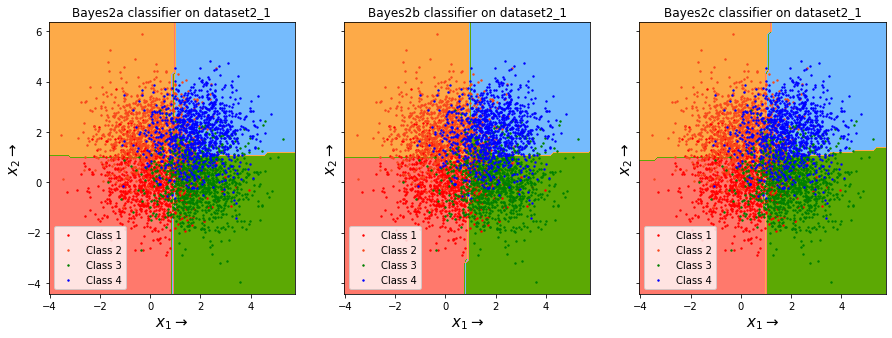

<Figure size 432x288 with 0 Axes>

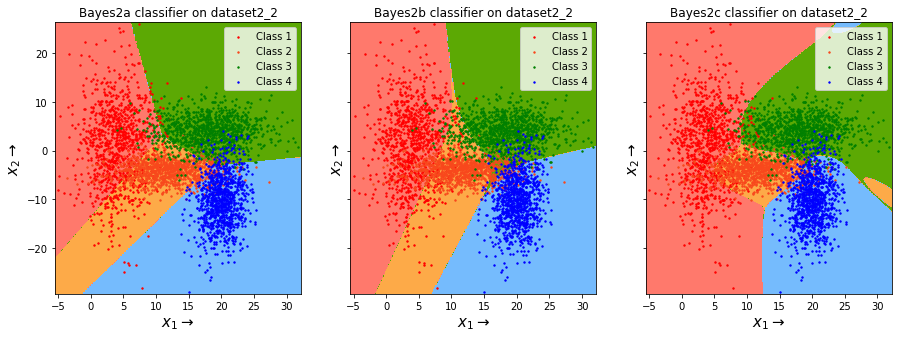

In [20]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
data2_1 = np.load('Data/dataset2_1.npz')
X_train, Y_train, X_test, Y_test = data2_1['arr_0'],data2_1['arr_1'],data2_1['arr_2'],data2_1['arr_3']
Y_pred_21a = Bayes2a(X_train,Y_train,X_test)
Y_pred_21b = Bayes2b(X_train,Y_train,X_test)
Y_pred_21c = Bayes2c(X_train,Y_train,X_test)
X_min = np.min(X_train,axis=0)
X_max = np.max(X_train,axis=0)
L = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])


loss = L[Y_test.astype(int)-1,Y_pred_21a.astype(int)-1]
loss = np.sum(loss,axis=0)*1.0/len(Y_test)
loss = L[Y_test.astype(int)-1,Y_pred_21b.astype(int)-1]
loss = sum(loss)*1.0/len(Y_test)
loss = L[Y_test.astype(int)-1,Y_pred_21c.astype(int)-1]
loss = sum(loss)*1.0/len(Y_test)



X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.1),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.1))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
Za = Bayes2a(X_train,Y_train,test_samples)
Zb = Bayes2b(X_train,Y_train,test_samples)
Zc = Bayes2c(X_train,Y_train,test_samples)


plt.figure(0)
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
ax1.contourf(X,Y,Za.reshape(X.shape),colors=['#ff796c','#5ca904','#fdaa48','#75bbfd']) 
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='r',label='Class 1')
ax1.scatter(X_train[Y_train==2][:,0],X_train[Y_train==2][:,1],s=2,c='#f8481c',label='Class 2')
ax1.scatter(X_train[Y_train==3][:,0],X_train[Y_train==3][:,1],s=2,c='g',label='Class 3')
ax1.scatter(X_train[Y_train==4][:,0],X_train[Y_train==4][:,1],s=2,c='b',label='Class 4')
ax1.set_title('Bayes2a classifier on dataset2_1')
ax1.legend()
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)

ax2.contourf(X,Y,Zb.reshape(X.shape),colors=['#ff796c','#5ca904','#fdaa48','#75bbfd'])
ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='r',label='Class 1')
ax2.scatter(X_train[Y_train==2][:,0],X_train[Y_train==2][:,1],s=2,c='#f8481c',label='Class 2')
ax2.scatter(X_train[Y_train==3][:,0],X_train[Y_train==3][:,1],s=2,c='g',label='Class 3')
ax2.scatter(X_train[Y_train==4][:,0],X_train[Y_train==4][:,1],s=2,c='b',label='Class 4')
ax2.set_title('Bayes2b classifier on dataset2_1')
ax2.legend()
ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)

ax3.contourf(X,Y,Zc.reshape(X.shape),colors=['#ff796c','#5ca904','#fdaa48','#75bbfd'])
ax3.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='r',label='Class 1')
ax3.scatter(X_train[Y_train==2][:,0],X_train[Y_train==2][:,1],s=2,c='#f8481c',label='Class 2')
ax3.scatter(X_train[Y_train==3][:,0],X_train[Y_train==3][:,1],s=2,c='g',label='Class 3')
ax3.scatter(X_train[Y_train==4][:,0],X_train[Y_train==4][:,1],s=2,c='b',label='Class 4')
ax3.set_title('Bayes2c classifier on dataset2_1')
ax3.legend()
ax3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
plt.show()

data2_2 = np.load('Data/dataset2_2.npz')
X_train, Y_train, X_test, Y_test = data2_2['arr_0'],data2_2['arr_1'],data2_2['arr_2'],data2_2['arr_3']
Y_pred_22a = Bayes2a(X_train,Y_train,X_test)
Y_pred_22b = Bayes2b(X_train,Y_train,X_test)
Y_pred_22c = Bayes2c(X_train,Y_train,X_test)
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])


loss = L[Y_test.astype(int)-1,Y_pred_22a.astype(int)-1]
loss = np.sum(loss,axis=0)*1.0/len(Y_test)
loss = L[Y_test.astype(int)-1,Y_pred_22b.astype(int)-1]
loss = sum(loss)*1.0/len(Y_test)
loss = L[Y_test.astype(int)-1,Y_pred_22c.astype(int)-1]
loss = sum(loss)*1.0/len(Y_test)


X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.1),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.1))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
Za = Bayes2a(X_train,Y_train,test_samples)
Zb = Bayes2b(X_train,Y_train,test_samples)
Zc = Bayes2c(X_train,Y_train,test_samples)

plt.figure(1)
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
ax1.contourf(X,Y,Za.reshape(X.shape),colors=['#ff796c','#5ca904','#fdaa48','#75bbfd'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='r',label='Class 1')
ax1.scatter(X_train[Y_train==2][:,0],X_train[Y_train==2][:,1],s=2,c='#f8481c',label='Class 2')
ax1.scatter(X_train[Y_train==3][:,0],X_train[Y_train==3][:,1],s=2,c='g',label='Class 3')
ax1.scatter(X_train[Y_train==4][:,0],X_train[Y_train==4][:,1],s=2,c='b',label='Class 4')
ax1.set_title('Bayes2a classifier on dataset2_2')
ax1.legend()
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)

ax2.contourf(X,Y,Zb.reshape(X.shape),colors=['#ff796c','#5ca904','#fdaa48','#75bbfd'])
ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='r',label='Class 1')
ax2.scatter(X_train[Y_train==2][:,0],X_train[Y_train==2][:,1],s=2,c='#f8481c',label='Class 2')
ax2.scatter(X_train[Y_train==3][:,0],X_train[Y_train==3][:,1],s=2,c='g',label='Class 3')
ax2.scatter(X_train[Y_train==4][:,0],X_train[Y_train==4][:,1],s=2,c='b',label='Class 4')
ax2.set_title('Bayes2b classifier on dataset2_2')
ax2.legend()
ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax3.contourf(X,Y,Zc.reshape(X.shape),colors=['#ff796c','#5ca904','#fdaa48','#75bbfd'])
ax3.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='r',label='Class 1')
ax3.scatter(X_train[Y_train==2][:,0],X_train[Y_train==2][:,1],s=2,c='#f8481c',label='Class 2')
ax3.scatter(X_train[Y_train==3][:,0],X_train[Y_train==3][:,1],s=2,c='g',label='Class 3')
ax3.scatter(X_train[Y_train==4][:,0],X_train[Y_train==4][:,1],s=2,c='b',label='Class 4')
ax3.set_title('Bayes2c classifier on dataset2_2')
ax3.legend()
ax3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
plt.show()

Observations :
1. The Bayes 2a classifier can handle data for which the features are independent given the labels. It can only handle data that is linearly separable.
2. The Bayes 2b classifier can handle data for which the class conditional distributions (multivariate gaussian) have a common covariance matrix.
3. The Bayes 2c classifier can handle data for which the class conditional distributions can have different covariance matrices. This results in higher flexibility of the model.
4. In case of dataset2_1, the features appear to be uncorrelated given the class. Thus, the decision boundaries of all the three models are very similar. Bayes 2c achieves the least expected loss as expected.
5. In case of dataset2_2, the class conditional distributions have different covariances across different classes.
6. Bayes 2a performs the worst, where the decision boundary between class A and B are dependent only on the direction of the difference between the mean vectors of A and B.
7. Bayes 2b performs at par with Bayes 2a, This is because of the inability to handle different correlation between the features for different classes.
8. Bayes 2c performs the best, as can be seen from the confusion matrix.

The expected loss is given by the following table :

Classifier | Dataset2_1 | Dataset2_2  
--- | --- | --- 
Bayes 2a | 0.42975 |    0.1835
Bayes 2b | 0.429 |  0.1895
Bayes 2c | 0.42775 |  0.14075

The Confusion matrices for the three classifiers, evaluated for both the datasets are as follows :
Dataset 2_1

Confusion matrix for Bayes2a : 
$\begin{bmatrix} 633& 219& 136&  12\\ 97& 738&  62& 103\\86&  49& 770&  95\\ 15& 136& 194& 655 \end{bmatrix}$ 
  
Confusion matrix for Bayes2b : 
$\begin{bmatrix} 633& 218& 137&  12\\ 95& 743&  60& 102\\ 84& 49& 773&  94\\16& 137& 196& 651 \end{bmatrix}$ 
 
 
Confusion matrix for Bayes2c : 
$\begin{bmatrix}634& 217& 138&  11\\99& 742& 61& 98\\ 87& 47& 772&  94\\ 15& 134& 201& 650 \end{bmatrix}$ 
 

Dataset 2_2

Confusion matrix for Bayes2a : 
$\begin{bmatrix} 830& 150&  18&  2\\ 93& 784&  46& 77\\ 30&  61& 905& 4\\ 0&  23& 78&899\end{bmatrix}$ 
 
Confusion matrix for Bayes2b : 
$\begin{bmatrix} 891&106& 3&  0\\ 119& 691& 124& 66\\ 23&106&864& 7\\ 0&   5& 102& 893 \end{bmatrix}$ 

 
Confusion matrix for Bayes2c : 
$\begin{bmatrix}901&  80&  19& 0\\64& 824& 46& 66\\ 19&  31& 936&  14\\ 0&  36&  48& 916 \end{bmatrix}$ 





**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




<Figure size 432x288 with 0 Axes>

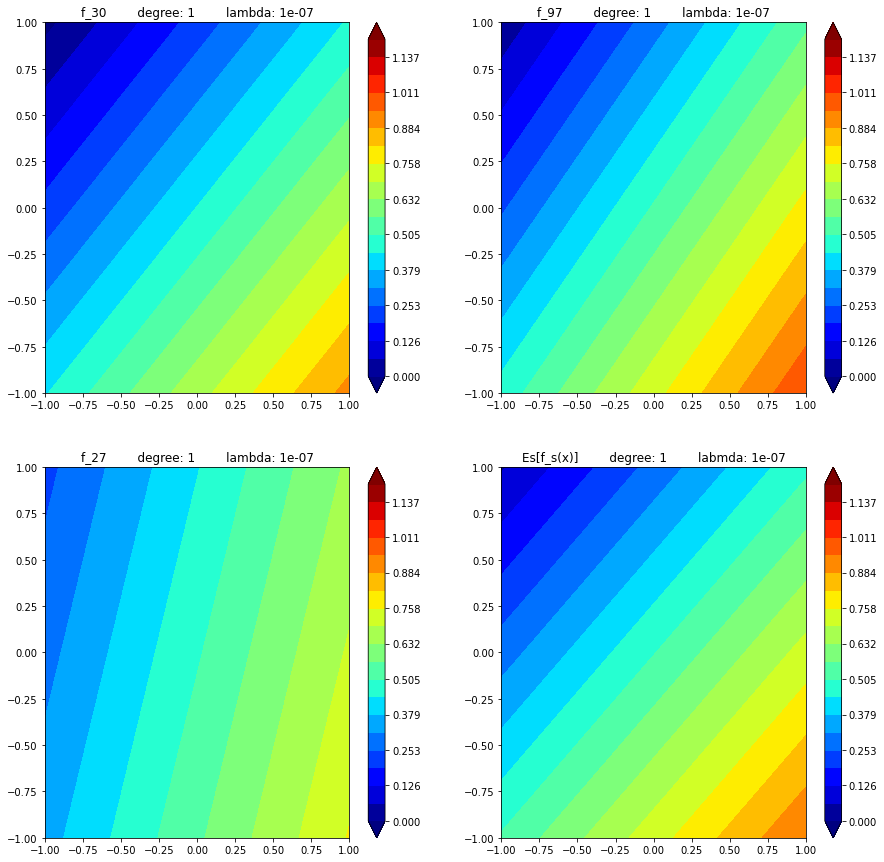

Degree= 1 lambda= 1e-07
Bias = 0.2826072421634187
Variance = 0.006842048259723507
MSE = 0.28311419053735576


<Figure size 432x288 with 0 Axes>

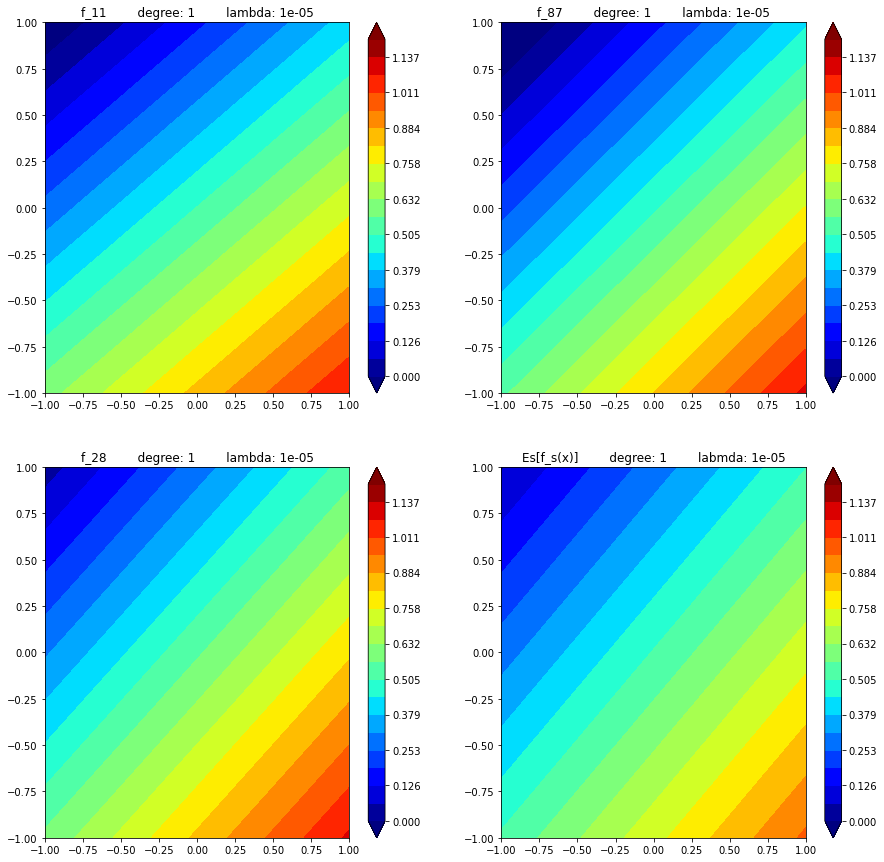

Degree= 1 lambda= 1e-05
Bias = 0.2916704484317853
Variance = 0.0068989959718089265
MSE = 0.29317248171124355


<Figure size 432x288 with 0 Axes>

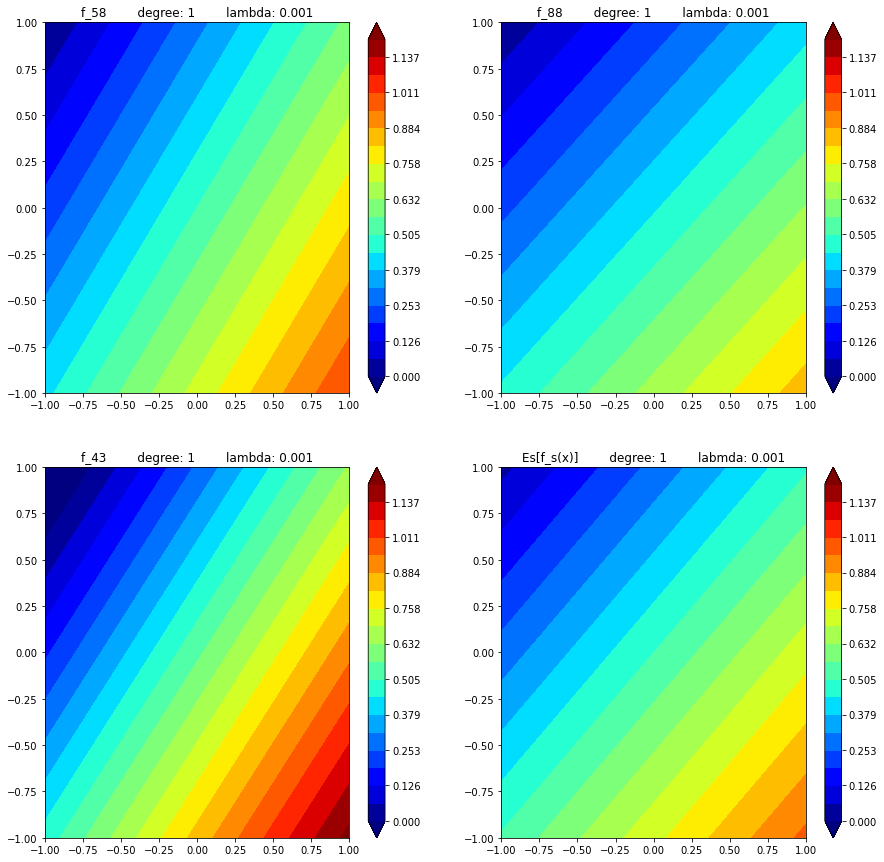

Degree= 1 lambda= 0.001
Bias = 0.2890928546789545
Variance = 0.006731797149705041
MSE = 0.2899269231376615


<Figure size 432x288 with 0 Axes>

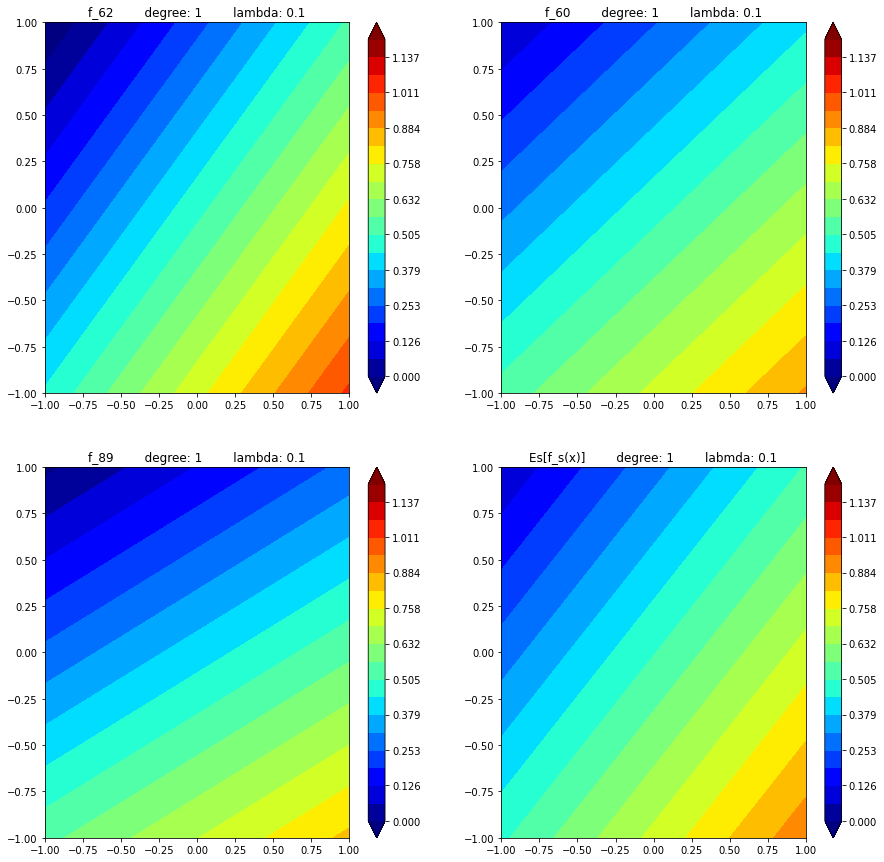

Degree= 1 lambda= 0.1
Bias = 0.2803113697671434
Variance = 0.006301233453623537
MSE = 0.281150129469289


<Figure size 432x288 with 0 Axes>

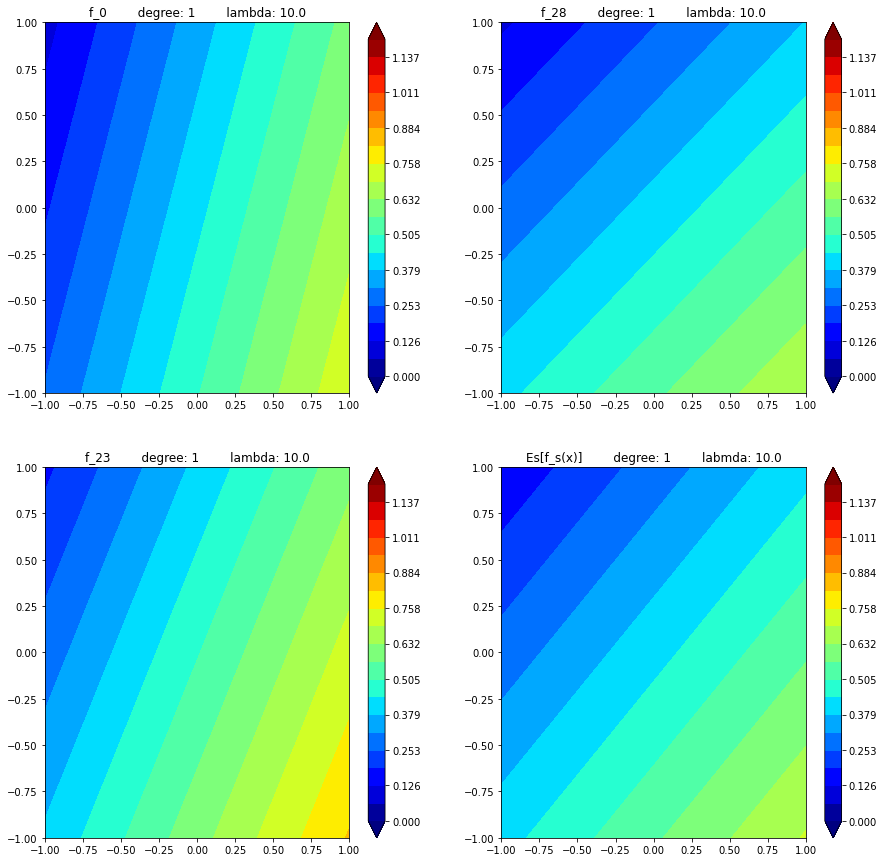

Degree= 1 lambda= 10.0
Bias = 0.19045529580257256
Variance = 0.0035659986137833847
MSE = 0.1900809838904865


<Figure size 432x288 with 0 Axes>

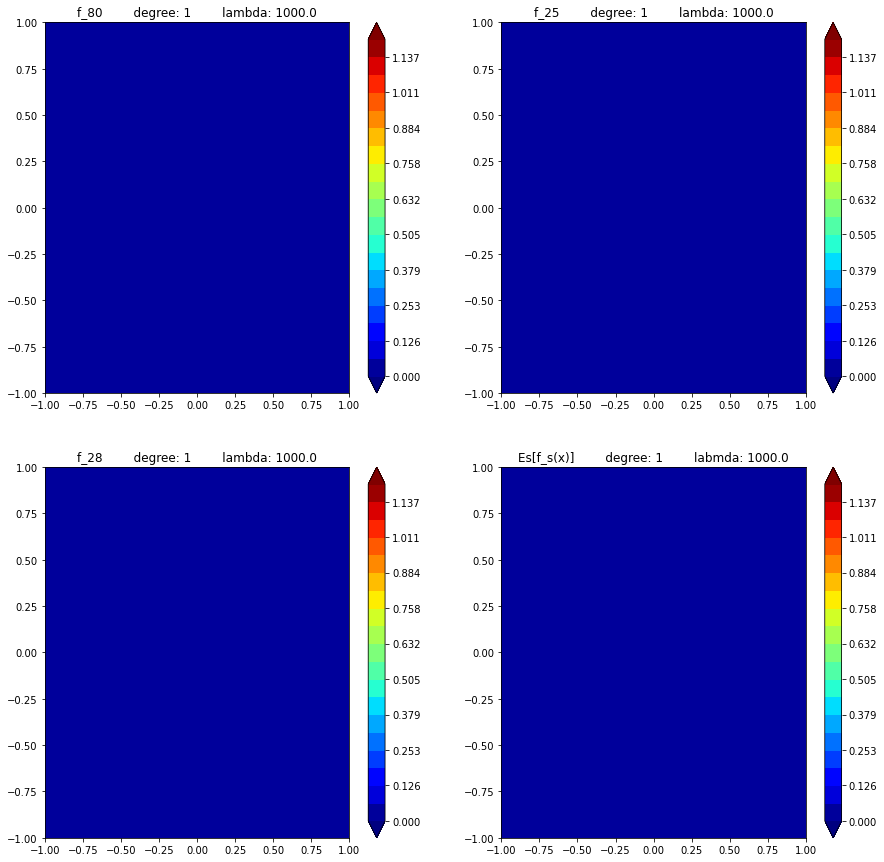

Degree= 1 lambda= 1000.0
Bias = 0.0005841557731404547
Variance = 1.2093124420824054e-05
MSE = 0.000583007456597997


<Figure size 432x288 with 0 Axes>

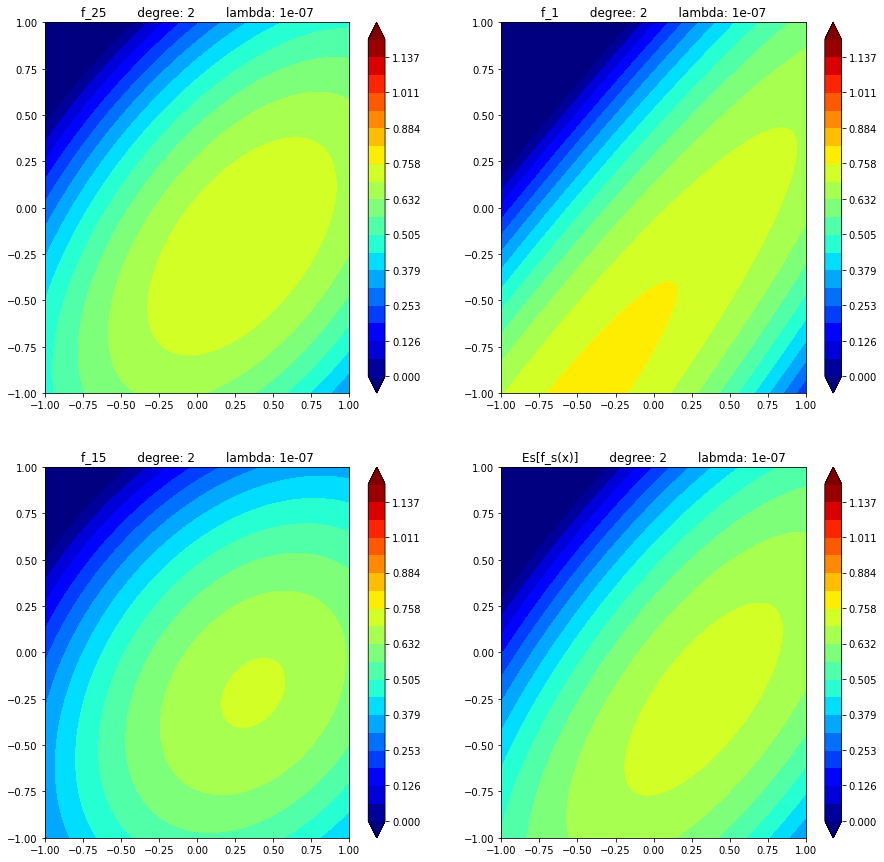

Degree= 2 lambda= 1e-07
Bias = 0.30878328429719254
Variance = 0.008982048805228201
MSE = 0.31187163505065346


<Figure size 432x288 with 0 Axes>

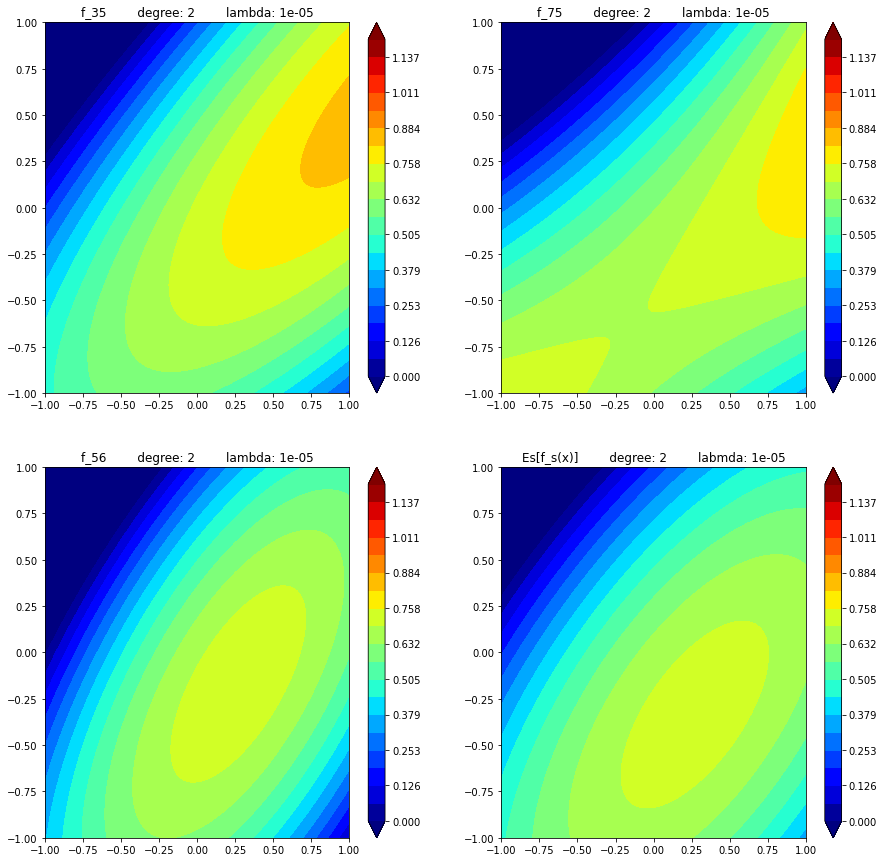

Degree= 2 lambda= 1e-05
Bias = 0.30783490114433887
Variance = 0.008557541759325424
MSE = 0.31027612052746584


<Figure size 432x288 with 0 Axes>

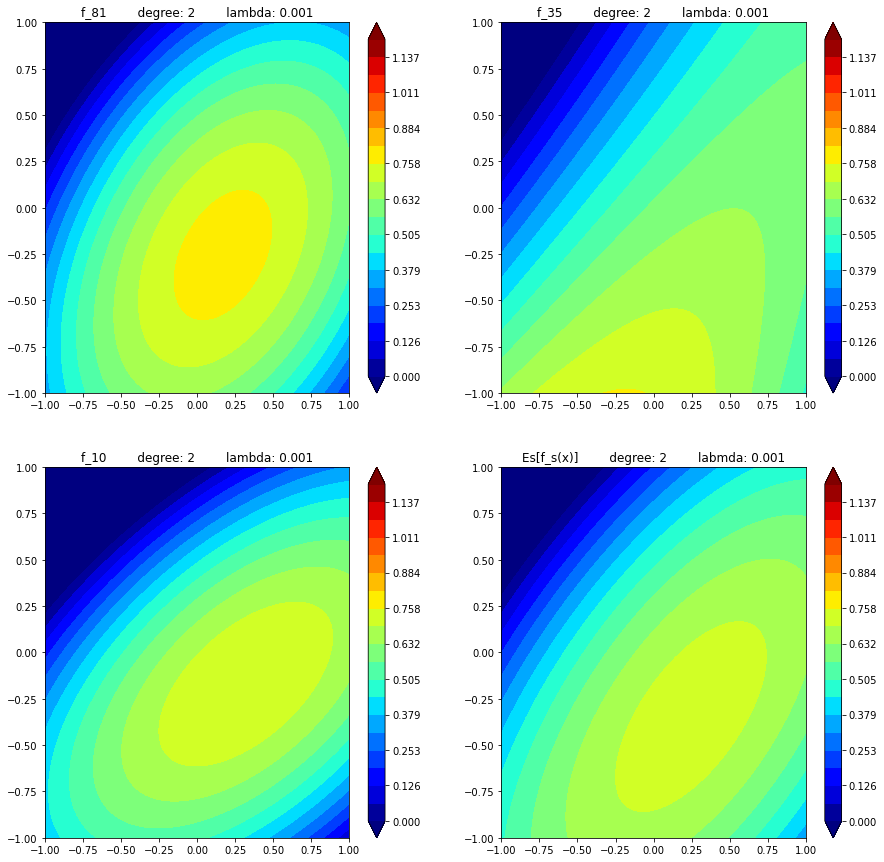

Degree= 2 lambda= 0.001
Bias = 0.30823235212943917
Variance = 0.008404868733179159
MSE = 0.3099809464632257


<Figure size 432x288 with 0 Axes>

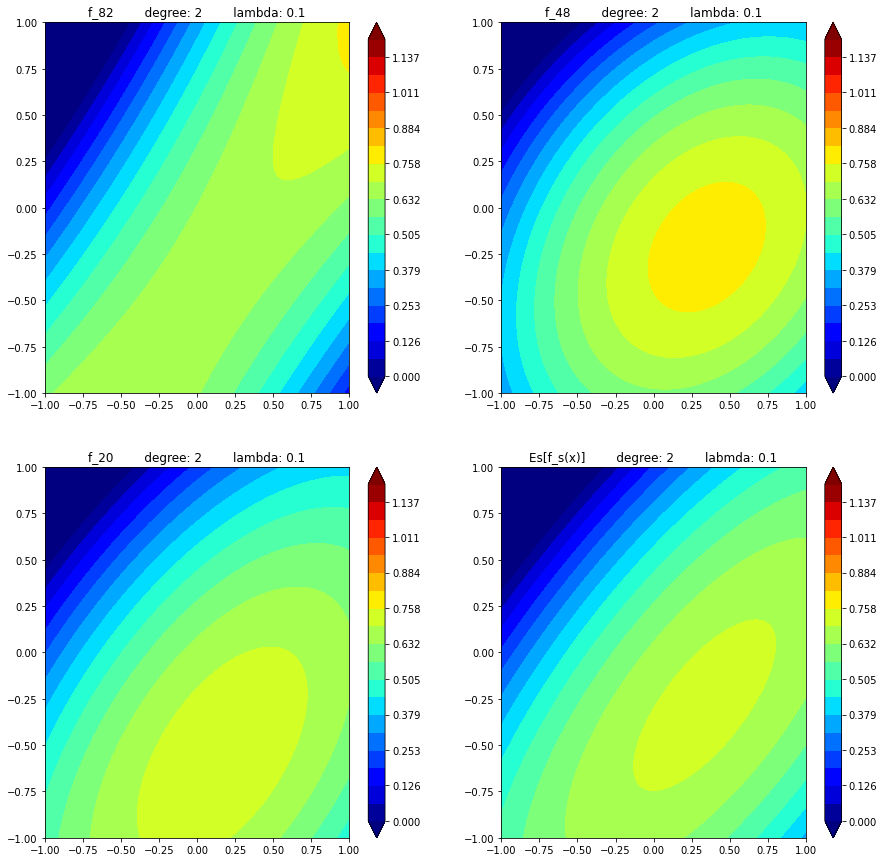

Degree= 2 lambda= 0.1
Bias = 0.30544927185216264
Variance = 0.007939813706650657
MSE = 0.3070735278336725


<Figure size 432x288 with 0 Axes>

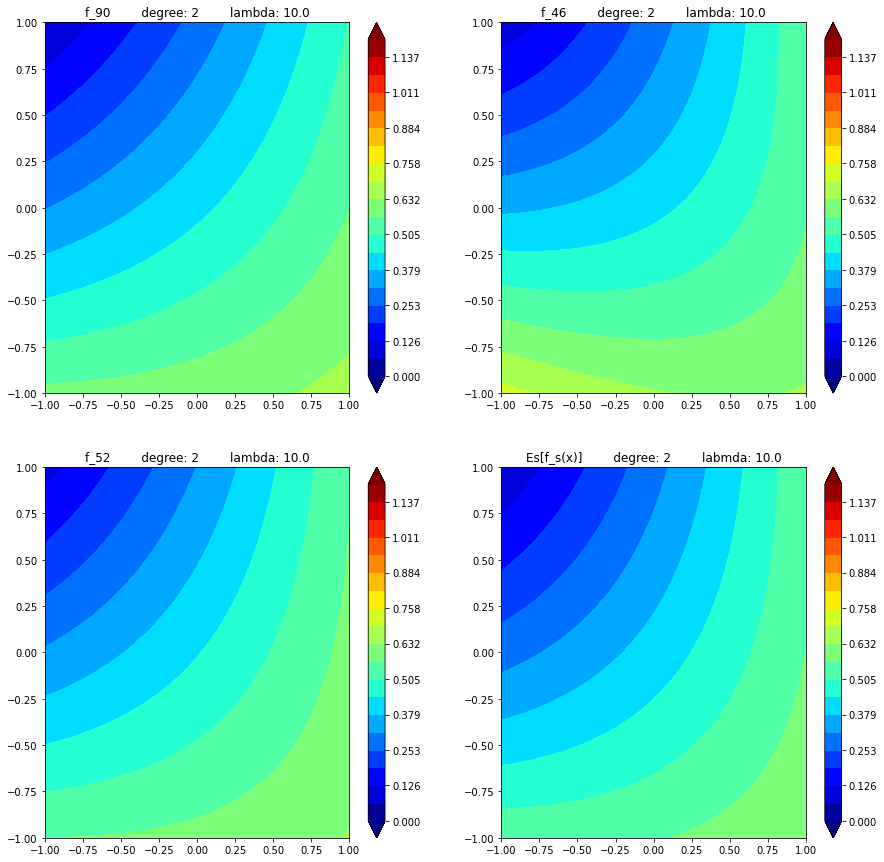

Degree= 2 lambda= 10.0
Bias = 0.19241910483672664
Variance = 0.0038247929500192486
MSE = 0.1925544029105389


<Figure size 432x288 with 0 Axes>

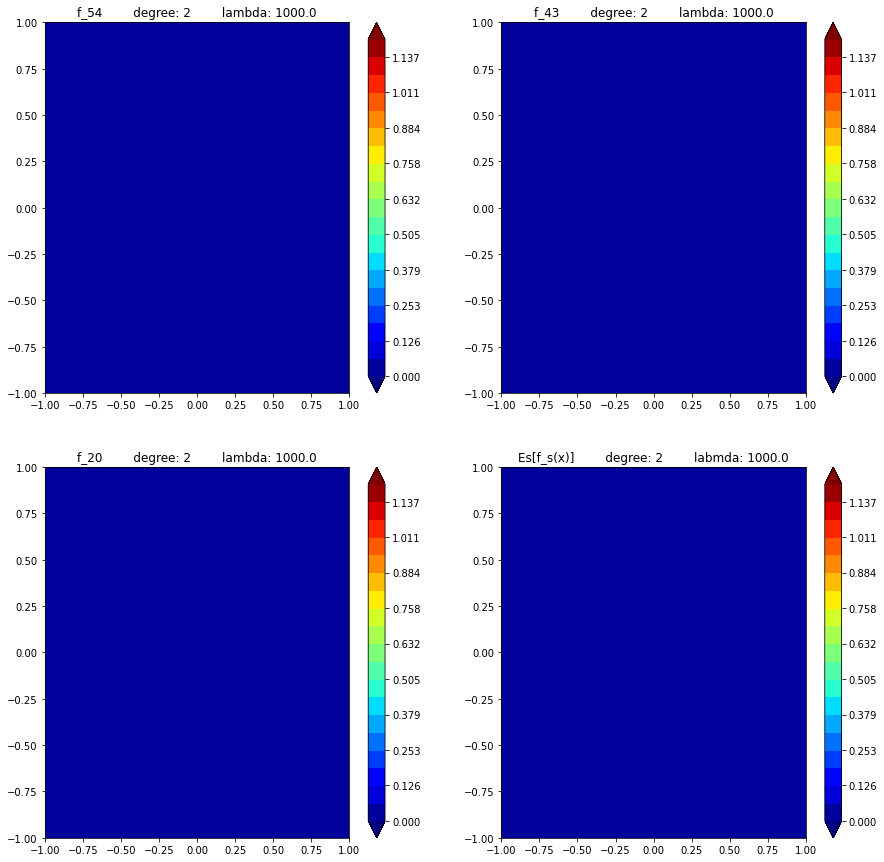

Degree= 2 lambda= 1000.0
Bias = 0.0008087024200102759
Variance = 1.5514202382287426e-05
MSE = 0.0008103421341211656


<Figure size 432x288 with 0 Axes>

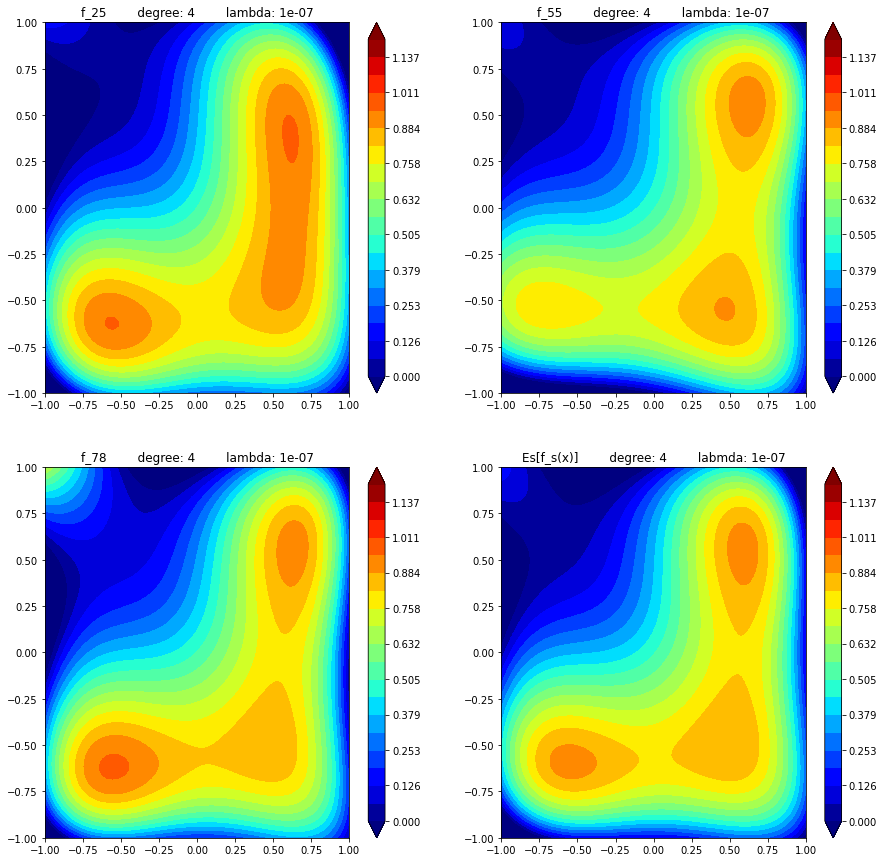

Degree= 4 lambda= 1e-07
Bias = 0.3309828044157482
Variance = 0.010005340174353283
MSE = 0.3339640312209099


<Figure size 432x288 with 0 Axes>

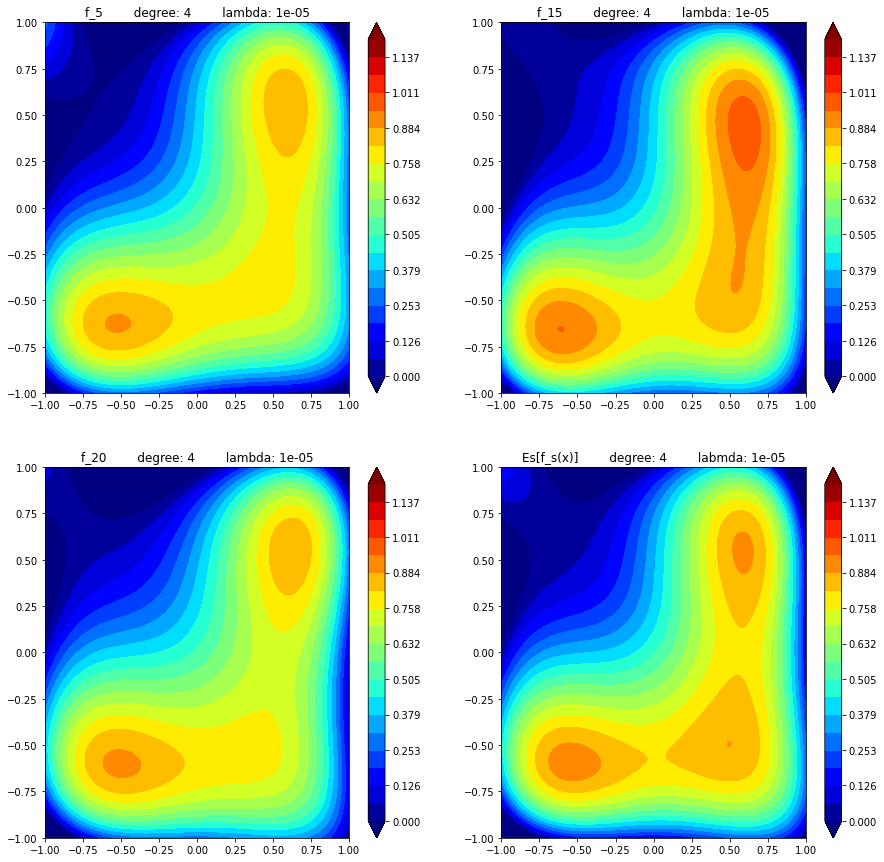

Degree= 4 lambda= 1e-05
Bias = 0.33541500652898365
Variance = 0.010157385681279668
MSE = 0.3389455951095651


<Figure size 432x288 with 0 Axes>

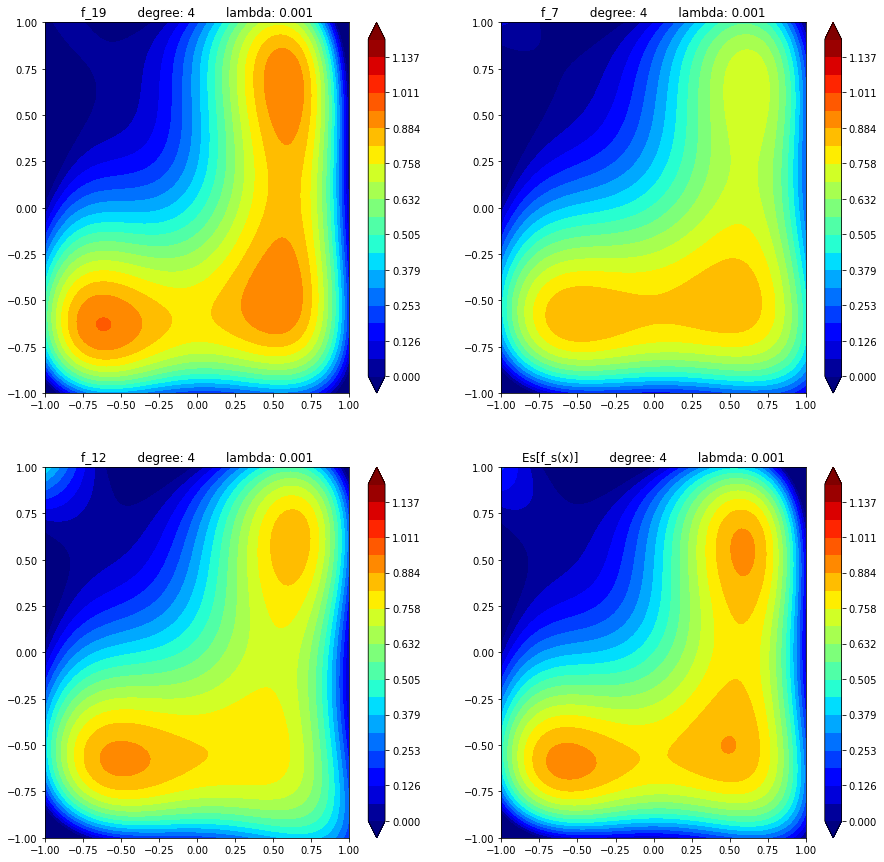

Degree= 4 lambda= 0.001
Bias = 0.3316992179462559
Variance = 0.011287988924819694
MSE = 0.3362506383476028


<Figure size 432x288 with 0 Axes>

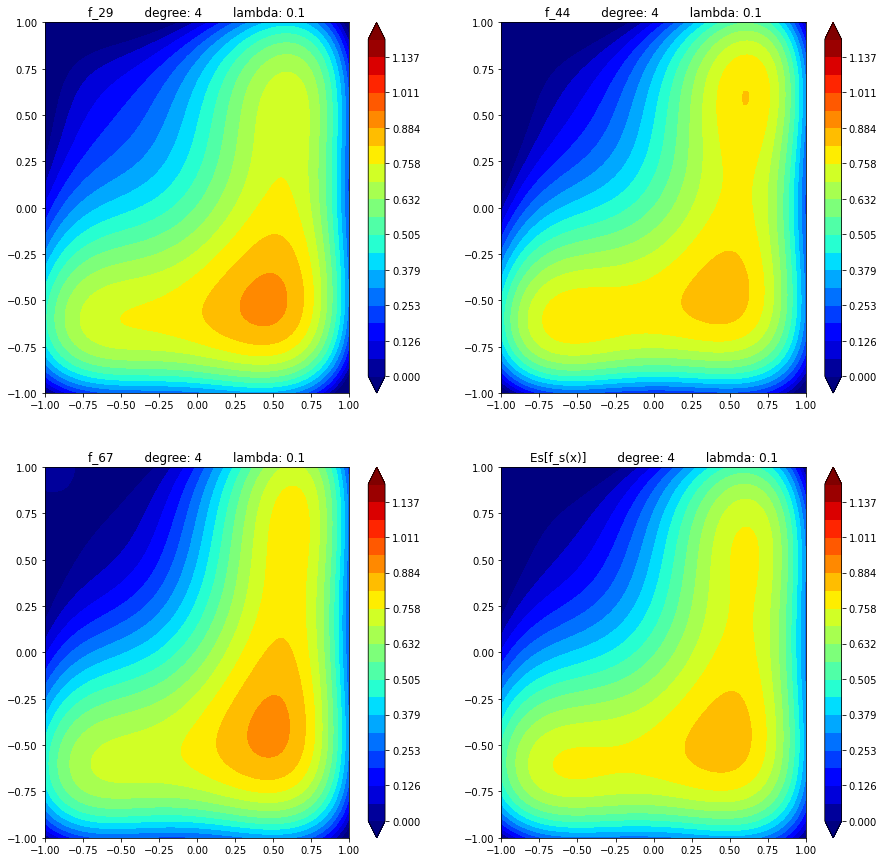

Degree= 4 lambda= 0.1
Bias = 0.31550585517447866
Variance = 0.006519559506711495
MSE = 0.31600798723279383


<Figure size 432x288 with 0 Axes>

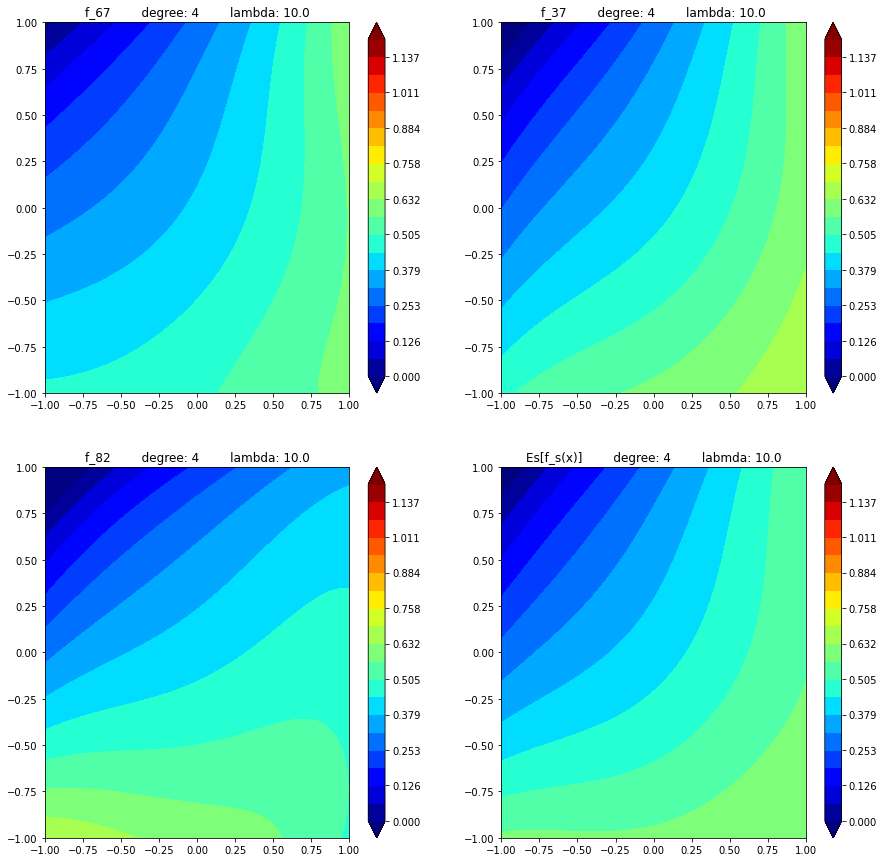

Degree= 4 lambda= 10.0
Bias = 0.1964379649519945
Variance = 0.004138844029019881
MSE = 0.1969710172952009


<Figure size 432x288 with 0 Axes>

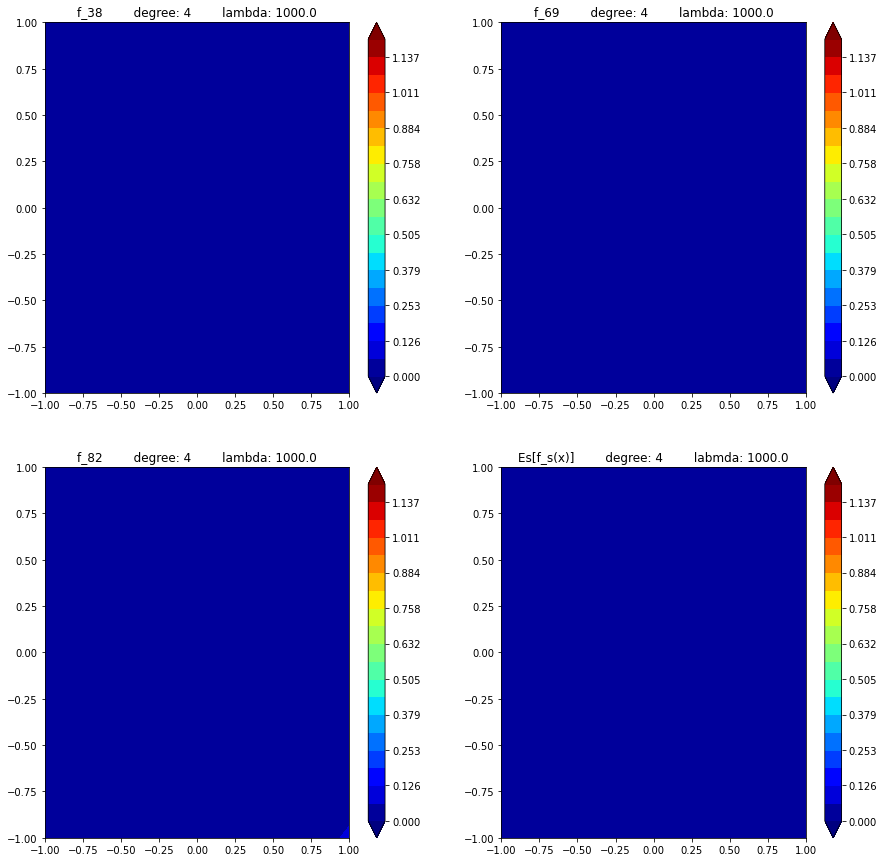

Degree= 4 lambda= 1000.0
Bias = 0.0009063064790694618
Variance = 2.0792597755509584e-05
MSE = 0.0009092809573383139


<Figure size 432x288 with 0 Axes>

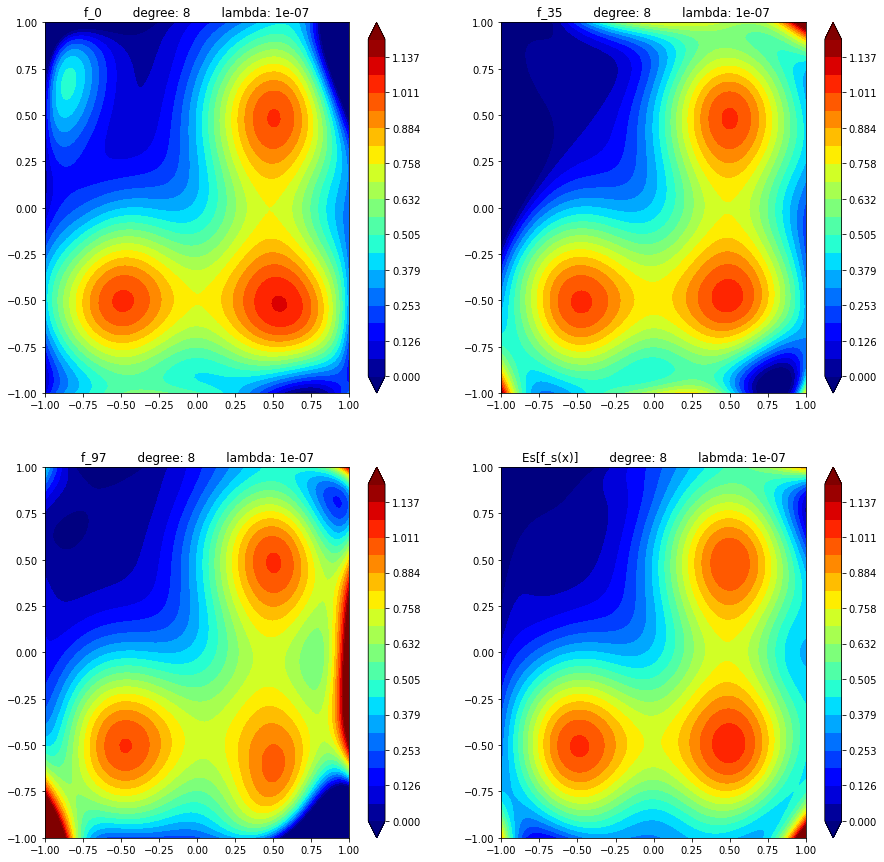

Degree= 8 lambda= 1e-07
Bias = 0.34735602953272254
Variance = 0.21819378950363572
MSE = 0.558811263442593


<Figure size 432x288 with 0 Axes>

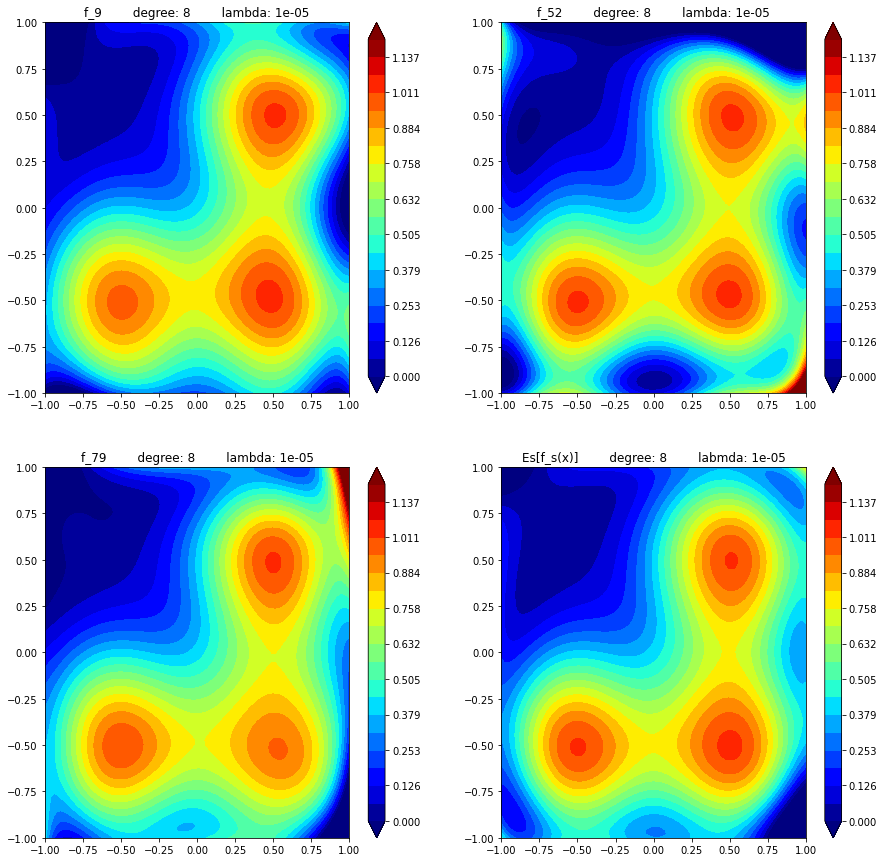

Degree= 8 lambda= 1e-05
Bias = 0.3314009441175309
Variance = 0.04631466898292806
MSE = 0.3709633458017518


<Figure size 432x288 with 0 Axes>

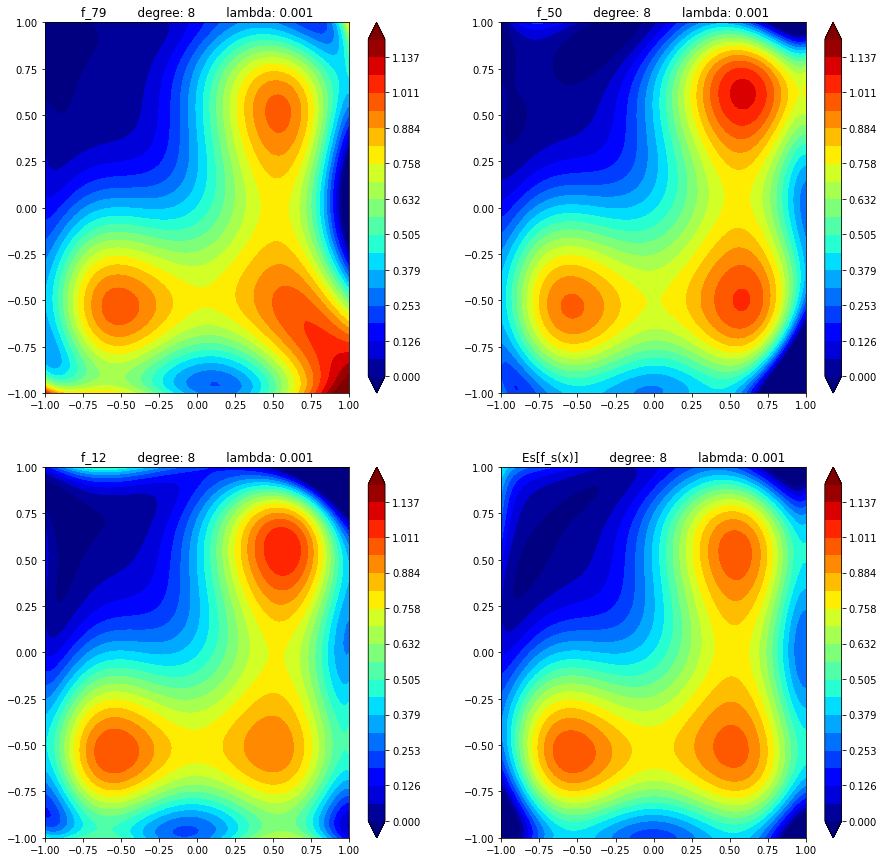

Degree= 8 lambda= 0.001
Bias = 0.3342668714150556
Variance = 0.020591930690592907
MSE = 0.3480110690356474


<Figure size 432x288 with 0 Axes>

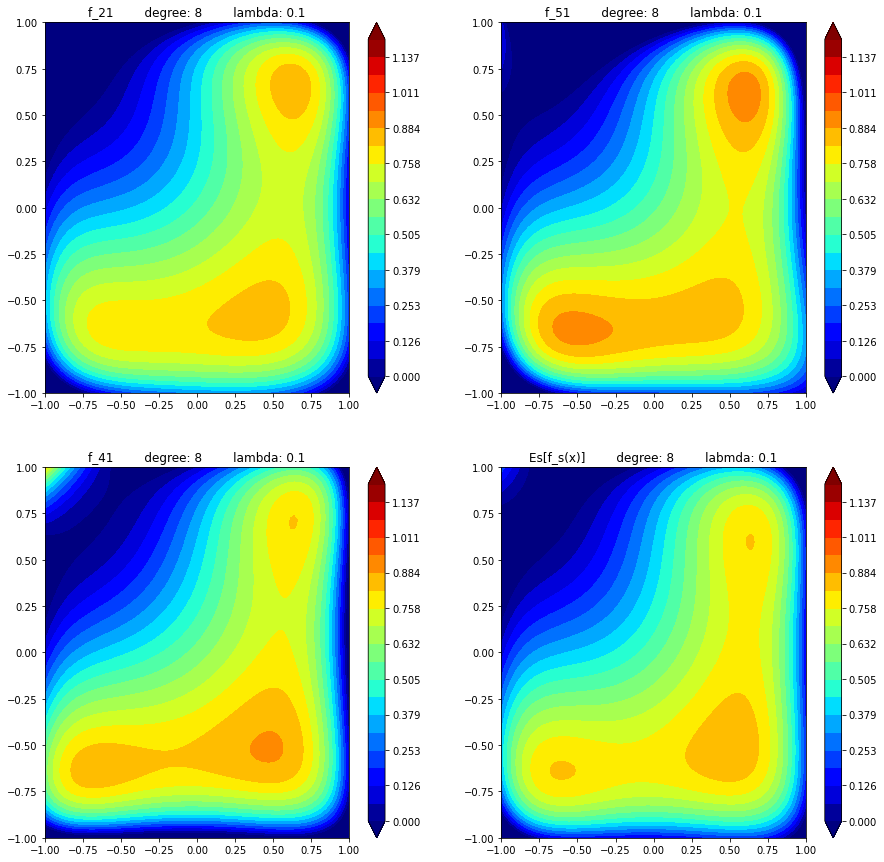

Degree= 8 lambda= 0.1
Bias = 0.3167525774277973
Variance = 0.009637692348023839
MSE = 0.32009877196805137


<Figure size 432x288 with 0 Axes>

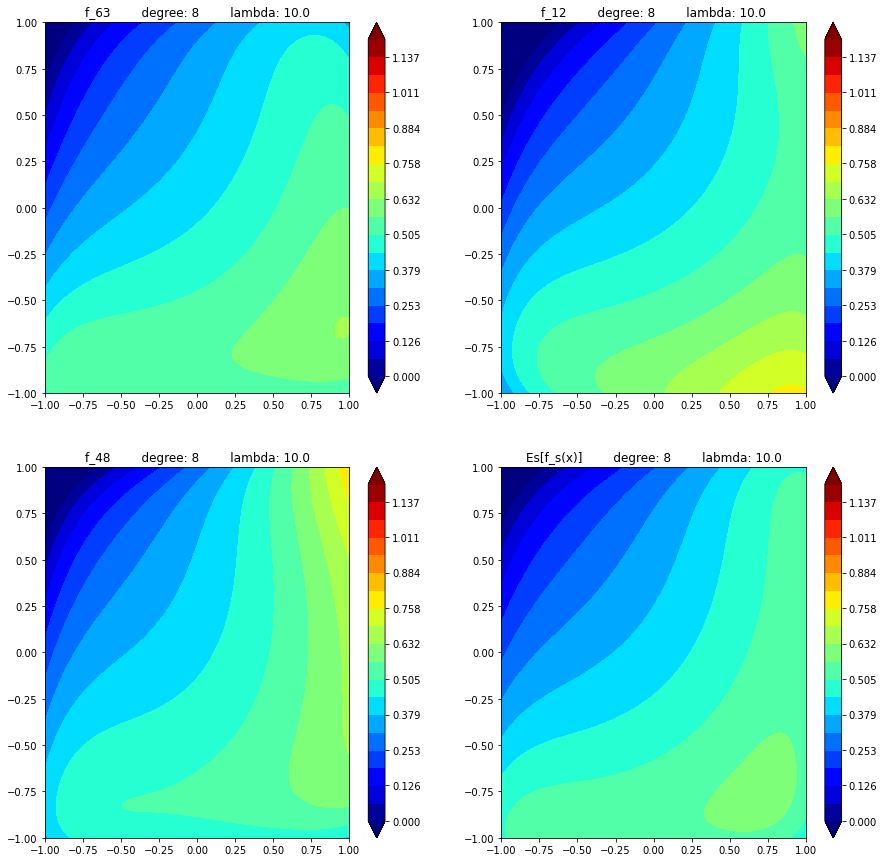

Degree= 8 lambda= 10.0
Bias = 0.19141405241859316
Variance = 0.004296576868431533
MSE = 0.1922863800228531


<Figure size 432x288 with 0 Axes>

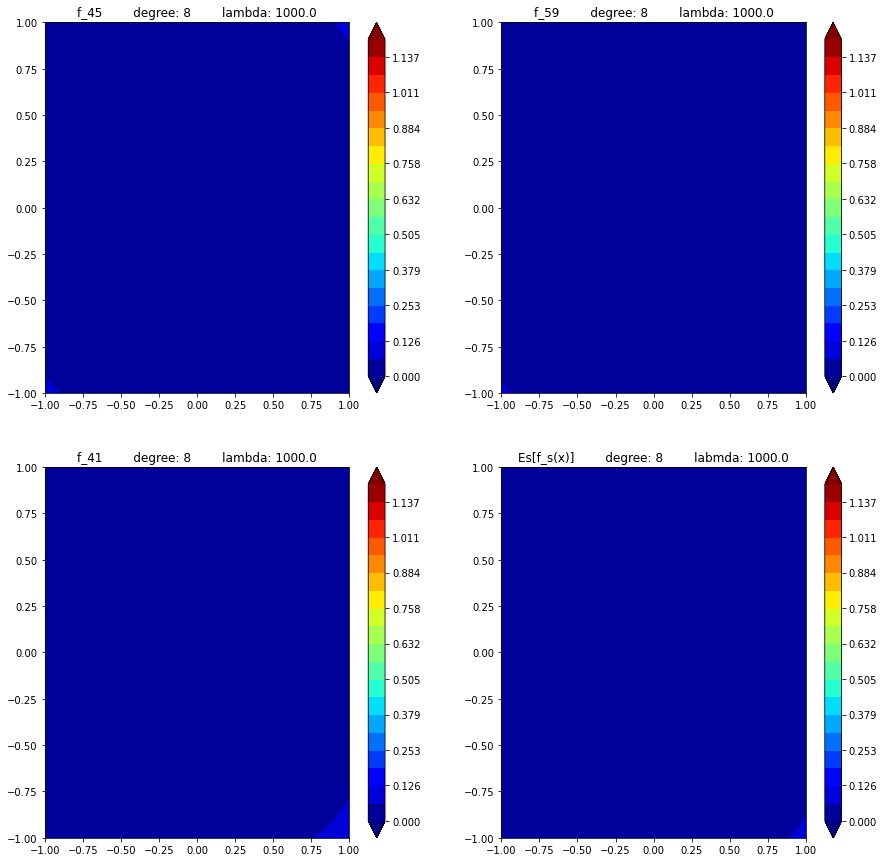

Degree= 8 lambda= 1000.0
Bias = 0.000991487485587878
Variance = 2.5020353860553457e-05
MSE = 0.000998167403307946


<Figure size 432x288 with 0 Axes>

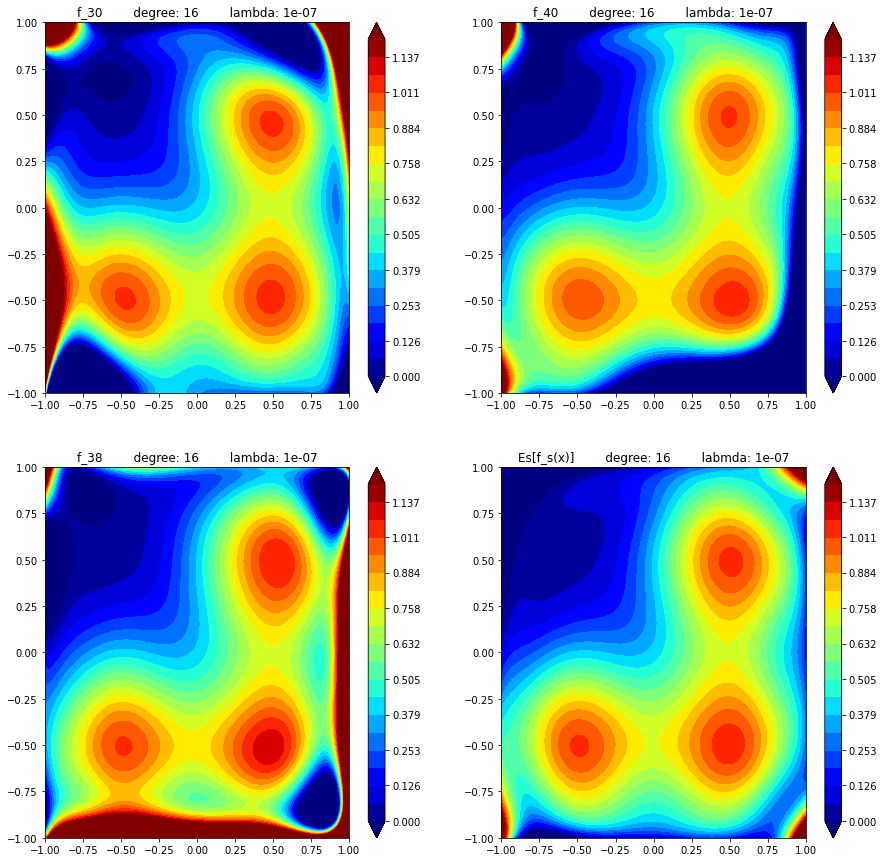

Degree= 16 lambda= 1e-07
Bias = 0.35288815329917156
Variance = 0.3177529691276295
MSE = 0.6629228859450035


<Figure size 432x288 with 0 Axes>

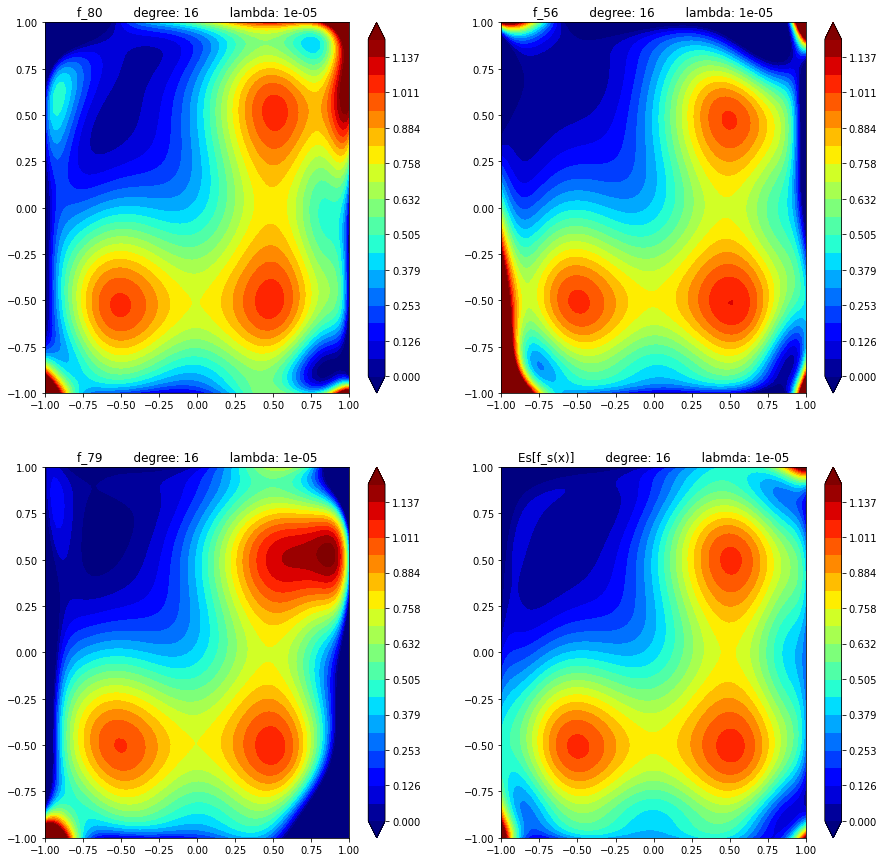

Degree= 16 lambda= 1e-05
Bias = 0.34288961925304123
Variance = 0.13080453688785787
MSE = 0.46654049938673403


<Figure size 432x288 with 0 Axes>

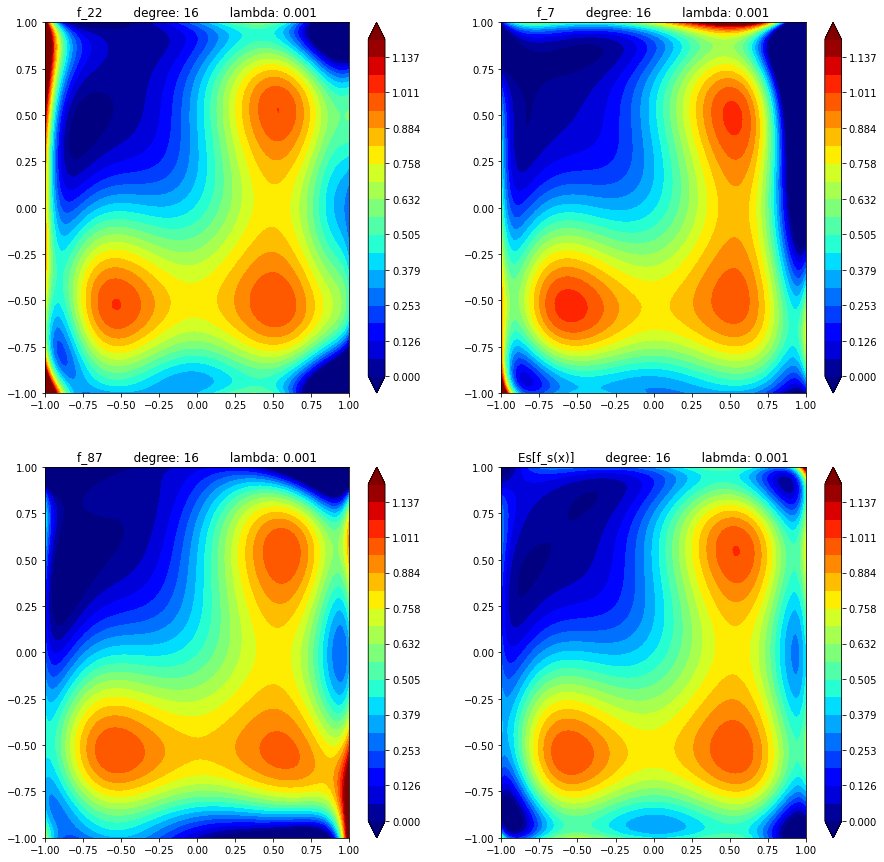

Degree= 16 lambda= 0.001
Bias = 0.3359561183682682
Variance = 0.051375908023062286
MSE = 0.38039168796876593


<Figure size 432x288 with 0 Axes>

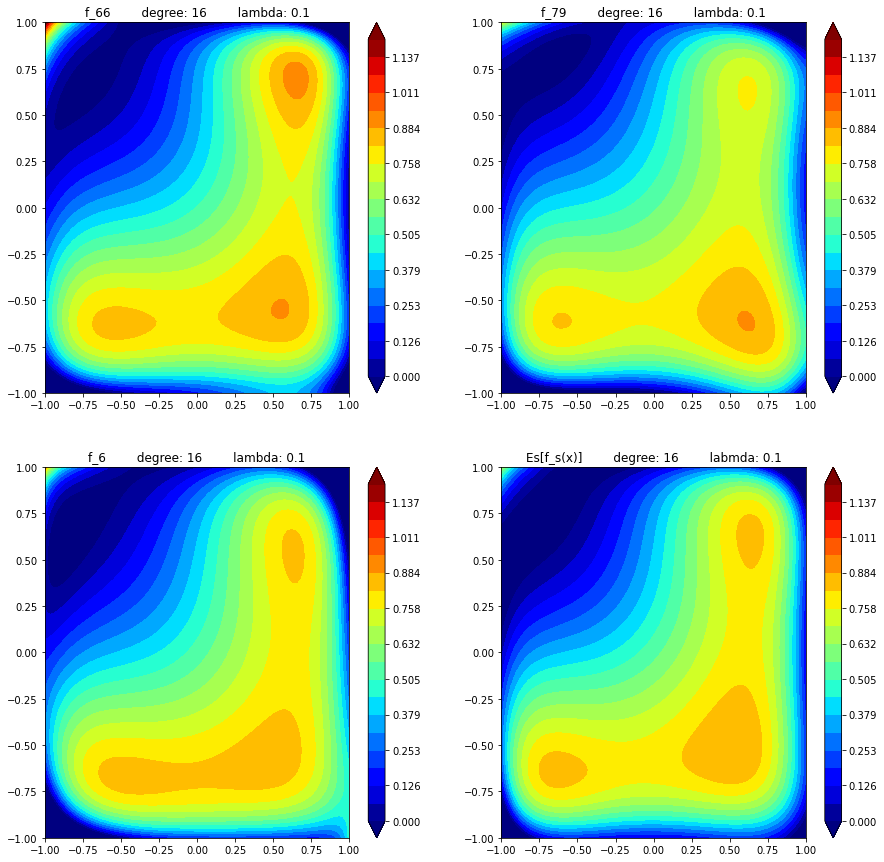

Degree= 16 lambda= 0.1
Bias = 0.3223313631095333
Variance = 0.012584098823135026
MSE = 0.3284060658776113


<Figure size 432x288 with 0 Axes>

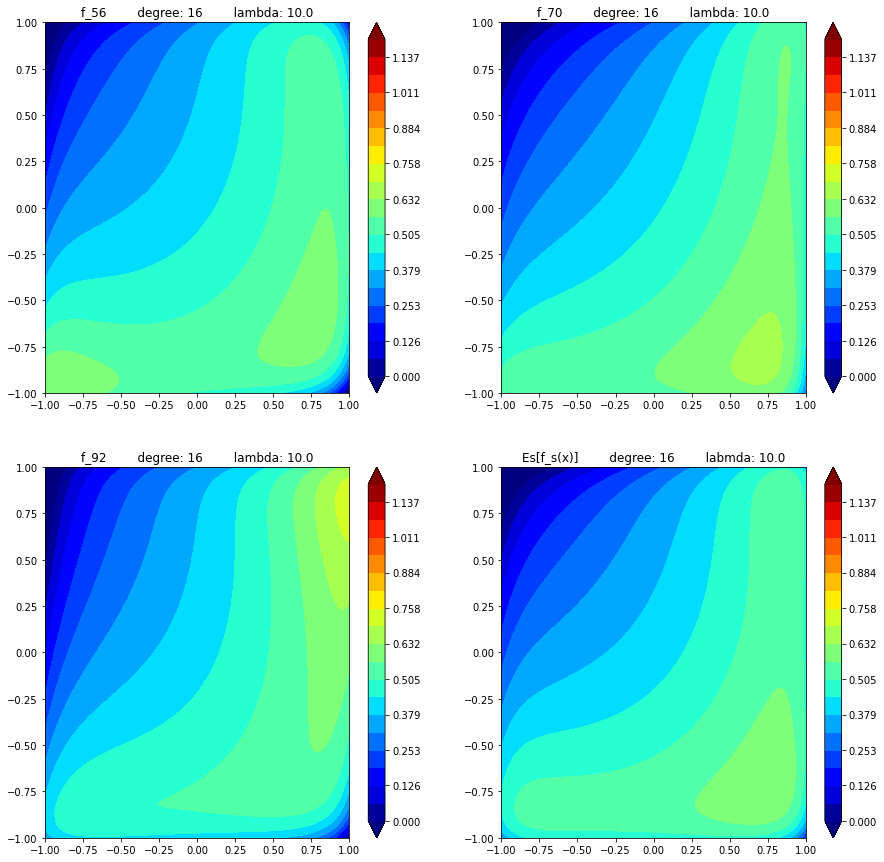

Degree= 16 lambda= 10.0
Bias = 0.1982669413142275
Variance = 0.00463023666074844
MSE = 0.1986434647983746


<Figure size 432x288 with 0 Axes>

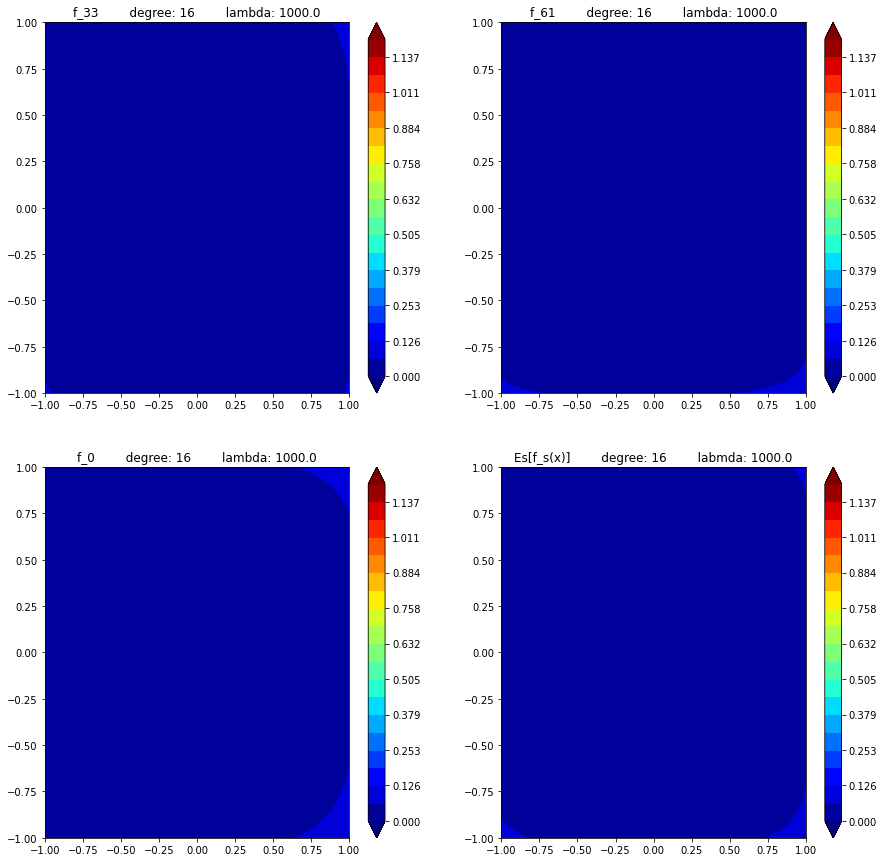

Degree= 16 lambda= 1000.0
Bias = 0.001069505978989909
Variance = 2.73792566824291e-05
MSE = 0.0010722958412793962


In [21]:
# Cell type : CodeWrite

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    d_dash = int((degree+1)*(degree+2)/2)

    x1 = np.zeros((len(X_test), degree+1))
    x2 = np.zeros((len(X_test), degree+1))

    for i in range(degree+1):
        x1[:,i] = X_test[:,0]**i
        x2[:,i] = X_test[:,1]**i

    phi = np.ones((X_test.shape[0],1))

    for i in range(degree+1):
        for j in range(degree+1):
            if (i+j)<=degree and i+j!=0:

                phi = np.hstack((phi, (x1[:,j]*x2[:,i]).reshape(-1,1)))

    return phi@wt_vector

    
    
def visualise_polynomial_2d(wt_vector, degree, subplot_number, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))

    # Get Z using other functions

    X_ = X.copy().reshape(-1,1)
    Y_ = Y.copy().reshape(-1,1)
    X_test = np.hstack((X_,Y_))

    Z = polynomial_regression_ridge_pred(X_test, wt_vector, degree=degree).reshape(100,100)
    
    plt.subplot(2,2,subplot_number)
    plt.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20), cmap='jet', extend='both')
    plt.title(title)
    plt.colorbar()
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Here you may assume d=2, for simplicity.
    
    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    d_dash = int((degree+1)*(degree+2)/2)

    x1 = np.zeros((len(X_train), degree+1))
    x2 = np.zeros((len(X_train), degree+1))

    for i in range(degree+1):
        x1[:,i] = X_train[:,0]**i
        x2[:,i] = X_train[:,1]**i

    phi = np.ones((X_train.shape[0],1))

    for i in range(degree+1):
        for j in range(degree+1):
            if (i+j)<=degree and i+j!=0:
              
                phi = np.hstack((phi, (x1[:,j]*x2[:,i]).reshape(-1,1)))

    w = np.linalg.inv((phi.T@phi+reg_param*np.eye(d_dash)))@(phi.T)@Y_train

    return w
    
    
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """

    a=[0.5,0.5]
    b=[-0.5,-0.5]
    c=[0.5,-0.5]
    Y_train = np.zeros((50,1))
    Y_test = np.zeros((10000,1))
    y_hat = np.zeros((10000,100))
    f_S = np.zeros((10000,100))
    d_dash = int((degree+1)*(degree+2)/2)
    w = np.zeros((d_dash,100))

    X_test = np.random.uniform(-1,1,(10000,2))

    Y_test[:] = np.exp(-4*np.linalg.norm(X_test-a)**2)+np.exp(-4*np.linalg.norm(X_test-b)**2)+np.exp(-4*np.linalg.norm(X_test-c)**2)       

    for runs in range(100):

      X_train = np.random.uniform(low=[-1,-1], high=[1,1], size=(num_training_samples,2))

      Y_train = np.exp(-4*(np.sum((X_train-a)**2, axis=1))) + np.exp(-4*(np.sum((X_train-b)**2, axis=1))) + np.exp(-4*(np.sum((X_train-c)**2, axis=1)))

      w_temp = polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param)  

      w[:,runs] = np.reshape(w_temp,(d_dash,))
          
    w_mean = np.mean(w, axis = 1)

    y_mean = polynomial_regression_ridge_pred(X_test, w_mean, degree=degree)

    bias = np.mean((y_mean-Y_test)**2)

    random_samples = np.random.randint(low=1, high=runs, size=3)-1
    
    plt.figure(figsize=(15,15))
    for i in range(3):
        temp = "f_{}        degree: {}        lambda: {}".format(random_samples[i], degree, reg_param)
        visualise_polynomial_2d(w[:,random_samples[i]], degree, subplot_number=i+1, title=temp)

    temp_ = "Es[f_s(x)]        degree: {}        labmda: {}".format(degree, reg_param)
    visualise_polynomial_2d(w_mean, degree, subplot_number=4, title=temp_)
    plt.show()
    
    for i in range(runs):

        y_hat[:,i] = polynomial_regression_ridge_pred(X_test, w[:,i], degree=degree)
    
    y_mean = y_mean.reshape(-1,1)

    variance = np.mean((y_hat-y_mean)**2)

    Y_test = Y_test.reshape(-1,1)

    mse = np.mean((y_hat-Y_test)**2)

    return bias, variance, mse

degrees = [1,2,4,8,16]
reg_params = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]
bias_matrix = np.zeros((len(degrees), len(reg_params)))
variance_matrix = np.zeros_like(bias_matrix)

for d in range(len(degrees)):
    for r in range(len(reg_params)):
        plt.figure()
        b,v,e = compute_BV_error_sample_plot(degrees[d], reg_params[r], 50)
        
        print('================================')
        print('Degree= '+str(degrees[d])+' lambda= '+str(reg_params[r]))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))

        bias_matrix[d,r] = b
        variance_matrix[d,r] = v
        

In [22]:
# Cell type: convenience


Bias 

Lambda | 1e-7 | 1e-5 | 1e-3 | 1e-1 | 1e1 | 1e3 
--- | --- | --- | --- | --- | --- | ---
Degree 1 | 0.287709 | 0.287089 | 0.290323 | 0.285857 | 0.184155 | 0.000569309
Degree 2    |  0.305015 | 0.312478 | 0.310135 | 0.313617 | 0.187309 | 0.000796141 
Degree 4     | 0.333547 | 0.334279 | 0.331902 | 0.324142 | 0.190519 | 0.000891751 
Degree 8     | 0.353054 | 0.335175 | 0.33613  | 0.325773 | 0.195171 | 0.00101486 
Degree 16    | 0.352213 | 0.342888 | 0.341785 | 0.32631  | 0.200543 | 0.00103253 


Variance 

Lambda | 1e-7 | 1e-5 | 1e-3 | 1e-1 | 1e1 | 1e3 
--- | --- | --- | --- | --- | --- | ---
 Degree 1     | 0.00676745 | 0.0067997 | 0.00674764 | 0.0058829  | 0.00359619 | 1.14434e-05 
 Degree 2     | 0.00813308 | 0.0085635 | 0.00812907 | 0.0088812  | 0.00357949 | 1.51678e-05 
Degree 4     | 0.0149201  | 0.0251517 | 0.0115133  | 0.00794914 | 0.00400411|2.10516e-05 
Degree 8     | 0.151524   | 0.0546361 | 0.0201594  | 0.00913926 |0.004891  |2.4811e-05 
Degree 16    | 0.343811   | 0.127532  |0.0463162  |0.0136406  | 0.00473116|2.57471e-05 


Observations :



1. The bias in general decreases as the degree of polynomial is increased. However, on increasing the degree too much, the bias term increases again as we do not have enough data points to generalize to polynomials of degree 8 or 16.


2. The variance for a fixed λ almost always increases with the degree of the polynomial. When λ is set to 1000 the bias values are exactly the same for all degrees as it dominates anything else. We have a polynomial which is almost always zero.
For polynomials of higher degree, the variance decreases as we increase λ irrespective of its value. For polynomials of lower degree, this is the case when the values of λ are relatively high. For lower λ values, the trends are less clear.

3. For polynomials of lower degree, almost always the bias increases as we increase λ irrespective of its value. For polynomials of higher degree, this is the case when the values of λ are relatively high. For lower λ values, the trends are less clear.




** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




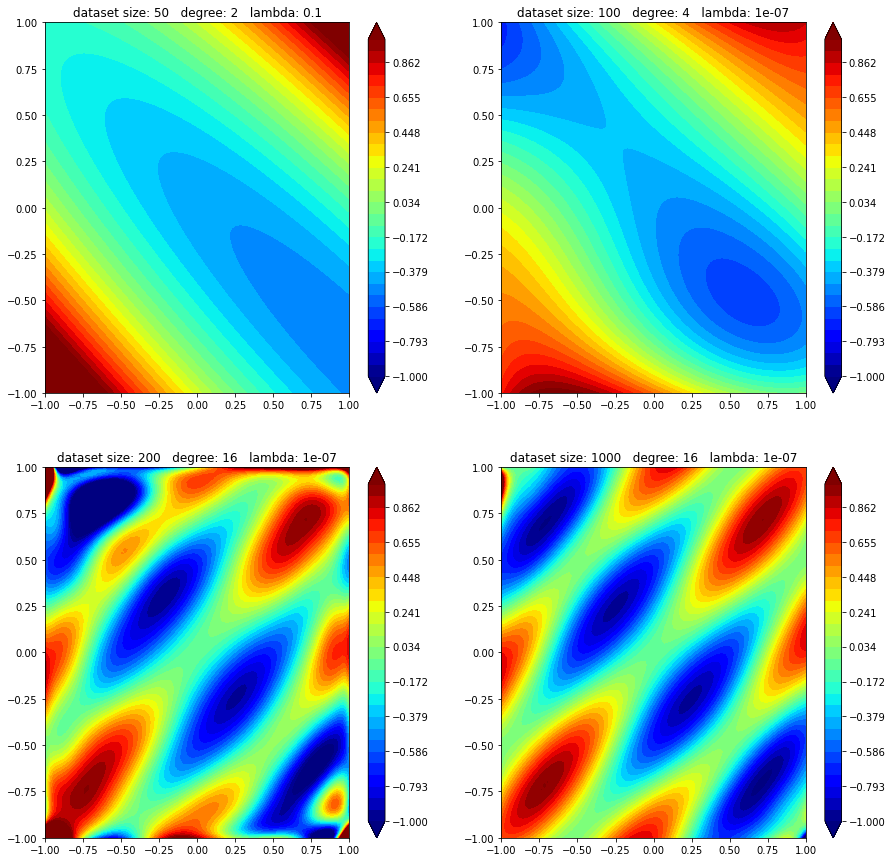

In [23]:
# Cell type : CodeWrite 

data4_1 = np.load('Data/dataset4_1.npz')
X_train, Y_train, X_test, Y_test = data4_1['arr_0'],data4_1['arr_1'],data4_1['arr_2'],data4_1['arr_3']

training_set_size = [50,100,200,1000]
degrees = [1,2,4,8,16]
reg_params = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]
test_sq_error = np.zeros((len(training_set_size),len(degrees), len(reg_params)))
train_sq_error = np.zeros_like(test_sq_error)
best_algo_indices = np.zeros((4,2))


for i in range(len(training_set_size)):

  for d in range(len(degrees)):

    for r in range(len(reg_params)):

      w_predicted = polynomial_regression_ridge_train(X_train[:training_set_size[i],:], Y_train[:training_set_size[i]], degrees[d], reg_params[r])

      y_train_predicted = polynomial_regression_ridge_pred(X_train[:training_set_size[i],:], w_predicted, degrees[d])

      y_test_predicted = polynomial_regression_ridge_pred(X_test, w_predicted, degrees[d])

      test_sq_error[i,d,r] = np.mean((Y_test-y_test_predicted)**2)

      train_sq_error[i,d,r] = np.mean((Y_train[:training_set_size[i]]-y_train_predicted)**2)

  best_algo_indices[i,:] = np.where(test_sq_error[i,:,:] == np.amin(test_sq_error[i,:,:]))

X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
X_ = X.copy().reshape(-1,1)
Y_ = Y.copy().reshape(-1,1)

X_test = np.hstack((X_,Y_))
plt.figure(figsize=(15,15))

for i in range(len(training_set_size)):

    i1 = int(best_algo_indices[i,0])
    i2 = int(best_algo_indices[i,1])

    wt_vector = polynomial_regression_ridge_train(X_train[:training_set_size[i],:], Y_train[:training_set_size[i]], degrees[i1], reg_params[i2])

    Z = polynomial_regression_ridge_pred(X_test, wt_vector, degrees[i1]).reshape(100,100)

    title = "dataset size: {}   degree: {}   lambda: {}".format(training_set_size[i], degrees[i1], reg_params[int(best_algo_indices[i][1])])
    plt.subplot(2,2,i+1)
    plt.contourf(X,Y,Z,levels=np.linspace(-1,1., 30), cmap='jet', extend='both')
    plt.title(title)
    plt.colorbar()
plt.show()



** Cell type : TextWrite **


Dataset Size:	50
		
MSE train		

lambda -->   |      1e-9 |       1e-7|      1e-5 |   1e-3 |  1e-1|1e1 
--- | --- | --- |--- |--- |--- |--- 
Degree 1 | 0.250383    | 0.250383   | 0.250383  | 0.250384  | 0.255898 | 0.303147 
Degree 2  | 0.134112    | 0.134112   | 0.134112  | 0.134213  | 0.197483 | 0.30166  
Degree 4  | 0.102018    | 0.102018   | 0.102019  | 0.104107  | 0.180638 | 0.299921 
Degree 8  | 0.000199157 | 0.0107658  | 0.0417213 | 0.081991  | 0.1632  | 0.298387 
Degree 16  | 9.367e-06   | 0.00131769 | 0.0311131 | 0.0700207 | 0.150013 | 0.297318 

MSE test			

lambda -->   |    1e-9 |      1e-7|     1e-5 |    1e-3 |   1e-1 |  1e1
--- | --- | --- |--- |--- |--- |--- 
Degree 1  | 0.301267 |  0.301267 | 0.301262 | 0.300838 | 0.278351 | 0.265042
Degree 2  |  0.1579   |  0.1579   | 0.157886| 0.156735 | 0.208224 | 0.263793
Degree 4  |   0.157334 |  0.157333 | 0.157243 | 0.161826 | 0.196569 | 0.26305
Degree 8  | 172.502    | 18.5943   | 0.990251 | 0.165156 | 0.193919 | 0.262405
Degree 16 | 232.025    | 66.6977   | 2.33731  | 0.203961 | 0.196057 | 0.262057 

MSE_test lowest for 	degree: 2	lambda: 0.1 and
MSE_train lowest for 	degree: 2	lambda: 0.1

Dataset Size:	100

MSE train		

lambda -->   |        1e-9 |       1e-7 |      1e-5 |      1e-3 |    1e-1 |     1e1
--- | --- | --- |--- |--- |--- |--- 
Degree 1     | 0.258091    | 0.258091   | 0.258091  | 0.258091  | 0.25874  | 0.273185 
Degree 2     | 0.130951    | 0.130951   | 0.130951  | 0.130966  | 0.164968 | 0.270714 
Degree 4     | 0.113027    | 0.113027   | 0.113027  | 0.113651  | 0.152373 | 0.268649 
Degree 8     | 0.0415879  | 0.04168    | 0.0580085 | 0.0929016 | 0.144886 | 0.266537 
Degree 16    | 0.000483967 | 0.00754402 | 0.0417292 | 0.0836969 | 0.139544 | 0.265013 

MSE test

lambda -->   |     1e-9 |      1e-7 |     1e-5 |     1e-3 |     1e-1 |      1e1 
--- | --- | --- |--- |--- |--- |--- 
Degree 1     |  0.273149 |  0.273149 | 0.273148 | 0.273083 | 0.268622 | 0.264962 
Degree 2     |  0.15321  | 0.15321  |0.153207 | 0.152916 | 0.175709 | 0.262612
Degree 4    |  0.142776 | 0.142776 | 0.142808 | 0.14602  | 0.16898  | 0.26114
Degree 8     |  0.71132  |  0.580759 | 0.203638 | 0.162628 | 0.171168 | 0.259777
Degree 16    | 11.7704   | 23.4166   | 0.417849 | 0.188359 | 0.17416  | 0.25899  

MSE_test lowest for 	degree: 4	lambda: 1e-07 and
MSE_train lowest for 	degree: 4	lambda: 1e-07


Dataset Size:	200

MSE train

lambda -->   |       1e-9 |      1e-7 |      1e-5 |      1e-3 |     1e-1 |      1e1 
--- | --- | --- |--- |--- |--- |--- 
Degree 1     | 0.246535   | 0.246535  | 0.246535  | 0.246535  | 0.246641 | 0.257631 
Degree 2     | 0.133665   | 0.133665  | 0.133665  | 0.133669  | 0.147549 |0.253672 
Degree 4    | 0.113338   | 0.113338  | 0.113338 |  0.11359   | 0.144444 | 0.250818
Degree 8     | 0.0617373  | 0.0617381 | 0.0639497 | 0.0956872 | 0.141193 | 0.247986
Degree 16    | 0.00108543 | 0.0113256 | 0.0444633 | 0.0834996 | 0.133763 | 0.2459   

MSE test		

lambda -->   |      1e-9 |     1e-7 |      1e-5 |     1e-3 |     1e-1 |      1e1
--- | --- | --- |--- |--- |--- |--- 
Degree 1     | 0.267663  | 0.267663 | 0.267663  | 0.267646 | 0.266225 | 0.263931 
Degree 2     | 0.145781  | 0.145781 | 0.14578   | 0.145754 | 0.158682 | 0.259707 
Degree 4     | 0.131171  | 0.131171 | 0.131164  | 0.130831 | 0.157085 | 0.257042 
Degree 8     | 0.137359  | 0.136982 | 0.118183  | 0.113965 | 0.156451 | 0.254477 
Degree 16    | 0.0837102 | 0.170807 | 0.0869037 | 0.111214 | 0.152244 | 0.252813 

MSE_test lowest for 	degree: 16	lambda: 1e-07 and
MSE_train lowest for 	degree: 16	lambda: 1e-07

Dataset Size:	1000

MSE train	

lambda -->   |       1e-9 |      1e-7 |     1e-5 |   1e-3 |   1e-1  |  1e1 
--- | --- | --- |--- |--- |--- |--- 
Degree 1     | 0.240728    | 0.240728   | 0.240728  | 0.240728  | 0.240729 | 0.241415 
Degree 2     | 0.138824    | 0.138824   | 0.138824  | 0.138824  | 0.139718 | 0.224383 
Degree 4     | 0.125017    | 0.125017   | 0.125017  | 0.125025  | 0.134172 | 0.216019 
Degree 8     | 0.0767429   | 0.0767429  | 0.0768462 | 0.094838  | 0.128438 | 0.209933 
Degree 16    | 0.000445127 | 0.00653349 | 0.0384153 | 0.0849926 | 0.121687 | 0.207497 


MSE test

lambda -->   |       1e-9 |      1e-7 |      1e-5 |     1e-3 |     1e-1|      1e1 
--- | --- | --- |--- |--- |--- |--- 
Degree 1     | 0.262535   | 0.262535  | 0.262535  | 0.262535  | 0.26253  | 0.263461 
Degree 2     | 0.142429   | 0.142429  | 0.142429  | 0.142442  | 0.144519 | 0.24446 
Degree 4     | 0.12708    | 0.12708   | 0.127081  | 0.127242  | 0.140937 | 0.235338
Degree 8     | 0.0848126  | 0.0848003 | 0.0839132 | 0.0978227 | 0.134989 | 0.22888  
Degree 16    | 0.00149007 | 0.0109572 | 0.0496581 | 0.0907374 |0.127821 | 0.22645  

MSE_test lowest for 	degree: 16	lambda: 1e-07 and
MSE_train lowest for 	degree: 16	lambda: 1e-07

Observations :

1. The optimal values of MSE train and MSE test are marked in bold.
The MSE on the trainset is always the best for λ=1e-9 and polynomial of degree 16. This is because a higher degree polynomial with low regularization will always fit the training data better.
2. Although the training MSE is very low for polynomials of higher degree when the dataset size is small, the test MSE is very high showing the model has just captured all the noise and has not learnt any useful generalization.
Lower degree polynomials with high enough λ do better on a smaller dataset showing they generalize better.
3. When we have higher number of data samples, we can fit higher degree polynomials which also generalize on the dataset.

** Cell type : TextRead **

# Problem 5 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell.












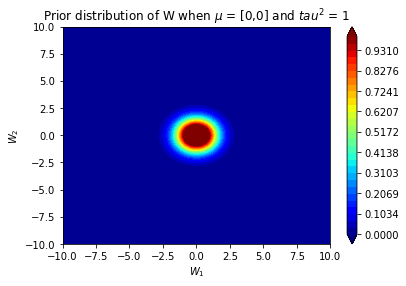

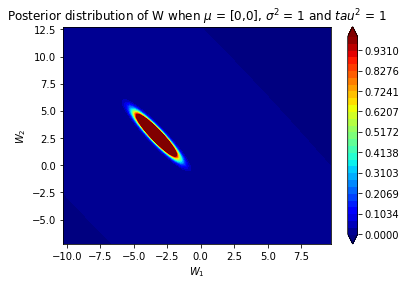

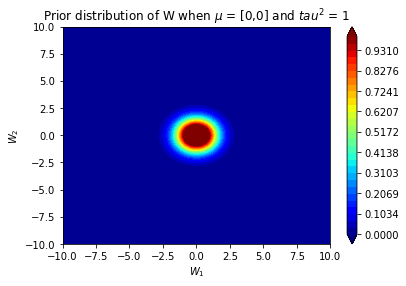

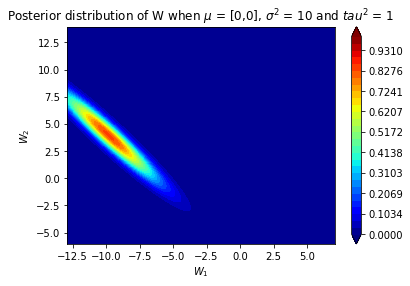

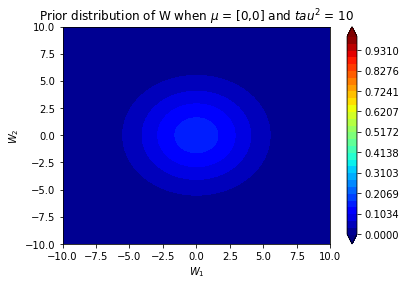

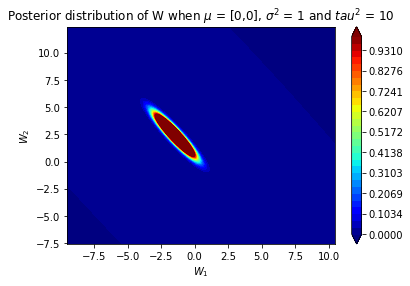

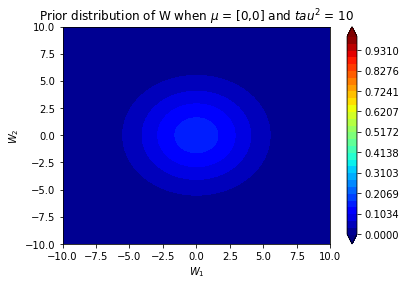

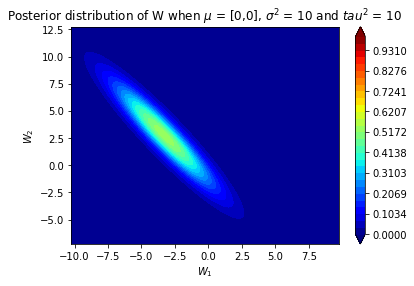

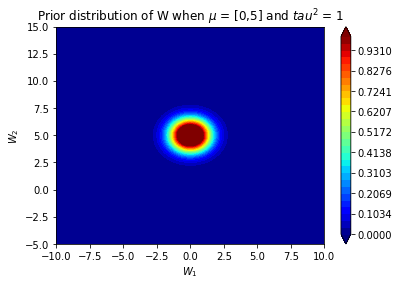

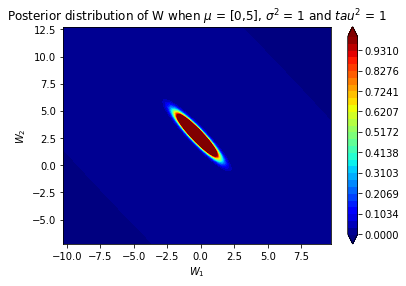

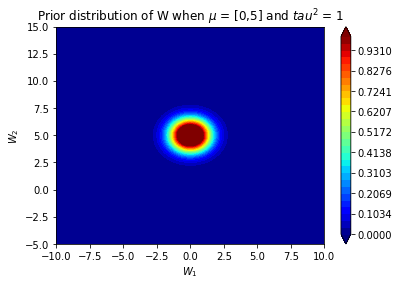

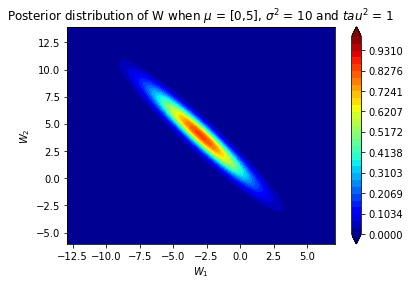

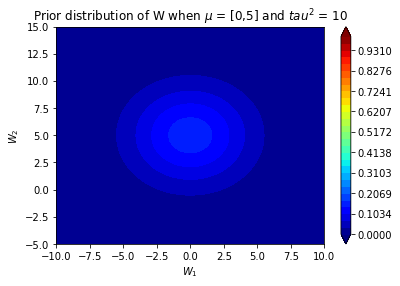

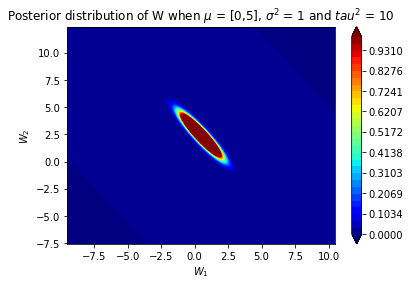

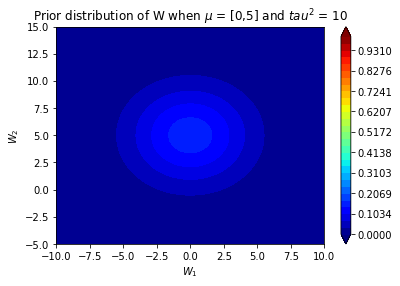

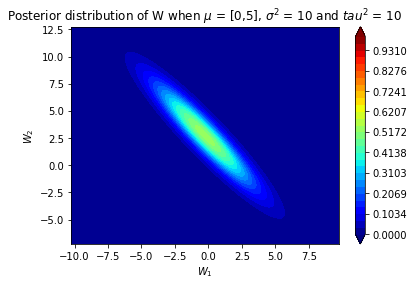

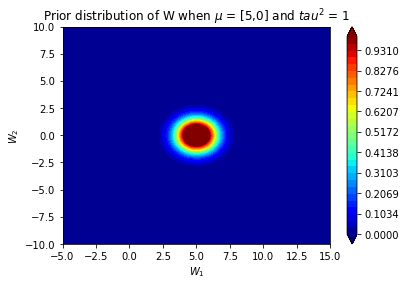

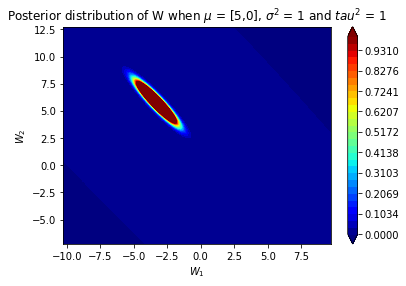

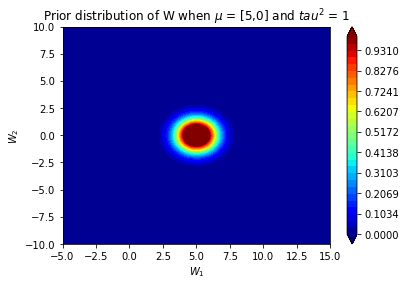

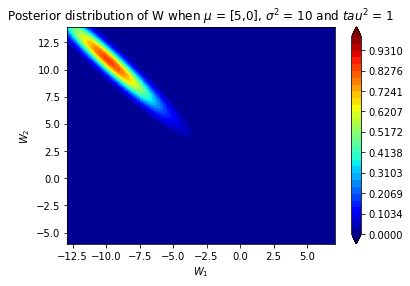

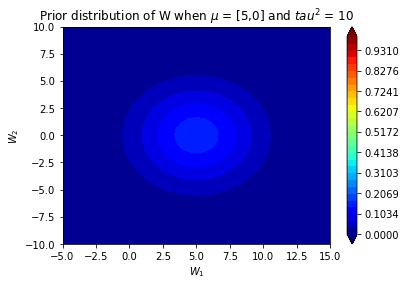

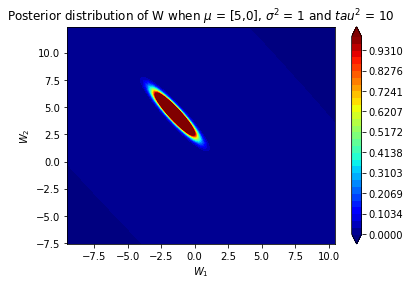

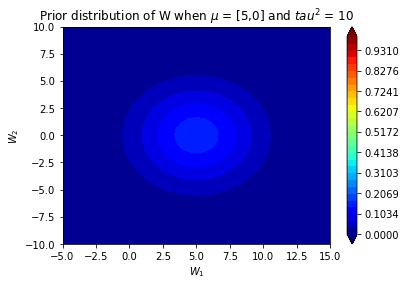

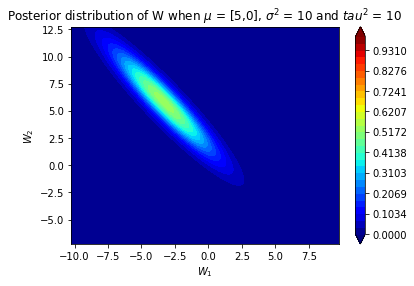

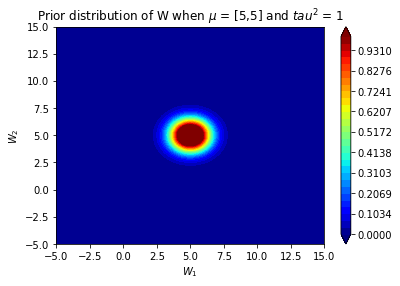

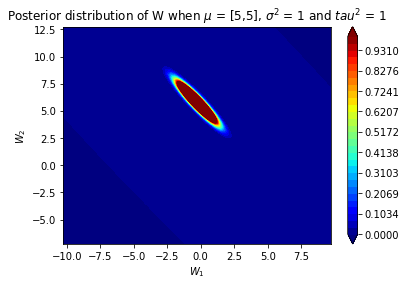

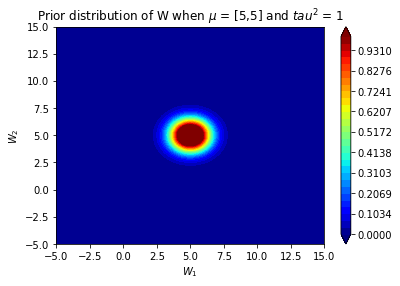

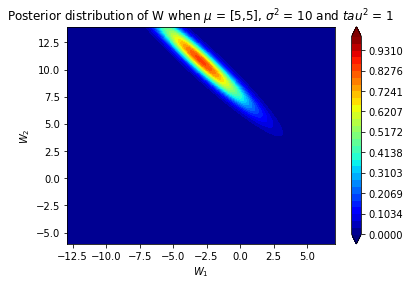

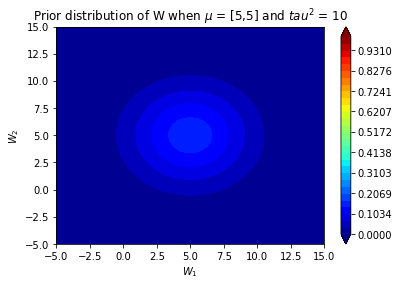

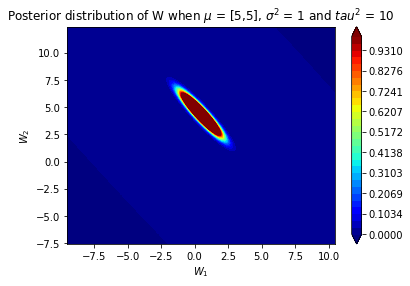

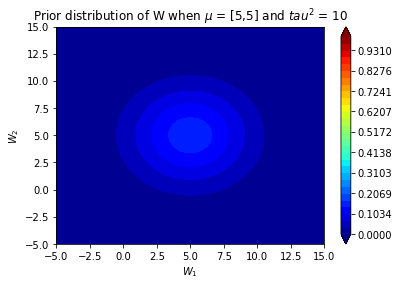

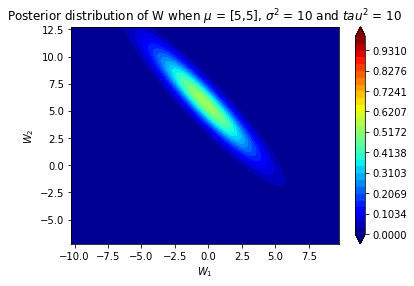

In [24]:
# Cell type : CodeWrite 

import matplotlib.pyplot as plt

X_matrix = [[1,2],[2,2.1],[0.6,1.5],[1.1,0.9]]
Y_matrix = [5.1,6.1,4.2,2.9]

mu_1 = [0,5]
mu_2 = [0,5]
tau_sq = [1,10]
sigma_sq = [1,10]
Z = np.zeros((1000,1000))
for i in range(2):
  for j in range(2):
    for k in range(2):
      for l in range(2):
        
        W_1 = np.linspace(-10+mu_1[i],10+mu_1[i],1000)
        W_2 = np.linspace(-10+mu_2[j],10+mu_2[j],1000)

        pi = 3.14

        X, Y = np.meshgrid(W_1, W_2)

        covariance_inv_prior = 1/tau_sq[k]*np.eye(2)

        for i1 in range(1000):
          for j1 in range(1000):

            Z[i1,j1] = np.sqrt(np.linalg.det(covariance_inv_prior))*np.exp(-np.matmul(np.matmul(np.transpose(np.array([W_1[i1]-mu_1[i], W_2[j1]-mu_2[j]])),covariance_inv_prior),np.array([W_1[i1]-mu_1[i], W_2[j1]-mu_2[j]]))/2)/2*pi

        
        plt.subplots(1,1)
        plt.contourf(X,Y,Z,levels=np.linspace(0,1., 30), cmap='jet', extend='both')
        plt.title('Prior distribution of W when $\mu$ = [{},{}] and $tau^2$ = {}'.format(mu_1[i],mu_2[j],tau_sq[k]))
        plt.colorbar()     
        plt.xlabel('$W_1$')
        plt.ylabel('$W_2$')
        plt.show()

        covariance_inv = np.matmul(np.transpose(X_matrix),X_matrix)/sigma_sq[l]+1/tau_sq[k]
        
        mu = np.transpose(np.matmul(np.matmul(np.transpose(Y_matrix),X_matrix),np.linalg.inv(covariance_inv))/sigma_sq[l])

        W_1 = np.linspace(-10+mu[0],10+mu[0],1000)
        W_2 = np.linspace(-10+mu[1],10+mu[1],1000)

        X, Y = np.meshgrid(W_1, W_2)

        for i1 in range(1000):
          for j1 in range(1000):

            Z[i1,j1] = np.sqrt(np.linalg.det(covariance_inv))*np.exp(-np.matmul(np.matmul(np.transpose(np.array([W_1[i1]-mu[i], W_2[j1]-mu[j]])),covariance_inv),np.array([W_1[i1]-mu[i], W_2[j1]-mu[j]]))/2)/2*pi

        plt.subplots(1,1)
        plt.contourf(X,Y,Z,levels=np.linspace(0,1., 30), cmap='jet', extend='both')
        plt.title('Posterior distribution of W when $\mu$ = [{},{}], $\sigma^2$ = {} and $tau^2$ = {}'.format(mu_1[i],mu_2[j],sigma_sq[l], tau_sq[k]))
        plt.colorbar()     
        plt.xlabel('$W_1$')
        plt.ylabel('$W_2$')
        plt.show()


Observations : 

1. The posterior distribution is also a Gaussian distribution.
2. We can see that when $\tau^2$ is greater than $\sigma^2$, that is when our confidence on the correctness of the prior is low, the posterior distribution is quite different from the prior distribution, as it depends more strongly on the observed data.